# Optimizing Capital Bikeshare Operations: Prediksi Jumlah Customer dengan Regresi Machine Learning

Daftar Isi:

A. Business Problem

B. Pemahaman Dataset

C. Persiapan Data

D. Pembuatan Model

E. Simpan Model

F. Luncurkan & Tes Model

G. Visualisasi Data Tes

H. Kesimpulan

I. Rekomendasi

## A. Business Problem

### 1. Latar Belakang
Layanan bike sharing kini menjadi tulang punggung transportasi berkelanjutan di kota-kota besar, yang menyediakan alternatif ramah lingkungan untuk perjalanan jarak pendek. Capital Bikeshare, salah satu pelopor bike sharing di Amerika Utara, telah menjadi penyedia layanan terkemuka sejak didirikan pada tahun 2010 di Washington, D.C. Hingga Mei 2025, Capital Bikeshare telah mengoperasikan lebih dari 5.800 sepeda di 700 stasiun yang tersebar di wilayah metropolitan D.C., Virginia, dan Maryland, dengan total 80 juta perjalanan sepanjang sejarahnya—menjadikannya salah satu sistem bike sharing terbesar di AS (berdasarkan data resmi Capital Bikeshare).

Capital Bikeshare melayani dua segmen pengguna utama:
- ***Casual Users***: Pengguna yang membayar untuk penggunaan sekali jalan (one-day pass), sering kali wisatawan atau pengguna rekreasi.
- ***Registered Users***: Pelanggan berlangganan jangka panjang (bulanan/tahunan), mayoritas adalah komuter perkotaan yang menggunakan sepeda untuk perjalanan rutin.


Memahami perilaku kedua segmen pengguna menjadi kunci untuk mengoptimalkan layanan, meningkatkan pendapatan, dan memastikan kepuasan pelanggan. Namun, Capital Bikeshare masih menghadapi tantangan:
- Kesulitan memprediksi permintaan per segmen: Tanpa pemahaman mendalam tentang faktor-faktor eksternal, perusahaan sering kali kelebihan atau kekurangan stok sepeda di stasiun tertentu.
- Kurangnya strategi terdiferensiasi: Pendekatan yang sama untuk kedua segmen mengakibatkan peluang konversi dari casual ke registered terlewatkan, terutama pada periode puncak penggunaan casual.
- Alokasi sumber daya marketing yang kurang efisien: Promosi yang tidak tepat waktu atau tidak tepat sasaran gagal memanfaatkan momen ketika pengguna casual paling aktif.

Untuk mengatasi tantangan, proyek ini mengembangkan model prediktif berbasis data untuk memperkirakan jumlah pengguna casual dan registered berdasarkan faktor eksternal (hari, waktu, dan cuaca) sehingga dapat digunakan untuk merancang strategi konversi segmen yang lebih efektif, dan pada akhirnya meningkatkan keuntungan perusahaan melalui pendapatan langganan yang lebih stabil dan berkelanjutan.


### 2. Rumusan Masalah
Berdasarkan latar belakang, dapat dibuat rumusan masalah analisis sebagai berikut:
1. Bagaimana cara memprediksi jumlah pengguna casual dan registered pada berbagai kondisi untuk mengoptimalkan operasional dan strategi pemasaran?
2. Faktor eksternal (cuaca, waktu dan hari) apa yang memiliki pengaruh paling signifikan terhadap perilaku pengguna casual dan registered?
3. Kondisi apa yang menyebabkan proporsi pengguna casual lebih tinggi dan dapat dimanfaatkan sebagai peluang untuk strategi konversi segmen?


### 3. Tujuan
Berdasarkan rumusan masalah, dapat dibuat tujuan analisis sebagai berikut:
1. Mengembangkan model prediktif untuk jumlah pengguna casual dan registered berdasarkan kondisi ekternal
2. Mengidentifikasi faktor-faktor kunci yang memengaruhi kedua segmen pengguna
3. Mengidentifikasi kondisi optimal untuk strategi konversi segmen casual ke registered

## B. Pemahaman Data

[Sumber data Capital Bike Sharing](https://drive.google.com/file/d/1lSbp2GTSgE8jwvA2K8rlLRZIUTWNNfXe/view?usp=share_link)

Dataset ini berisi informasi historis peminjaman sepeda secara lengkap yang terdiri dari 12.165 baris data dan 11 kolom utama sebagai berikut:

| Nama Kolom    | Tipe Data  | Null Count | Penjelasan |
|---------------|------------|------------|------------|
| `dteday`      | `object`   | 12,165 non-null | Tanggal peminjaman (format string) |
| `season`      | `int64`    | 12,165 non-null | Musim: <br>• 1: Winter <br>• 2: Spring <br>• 3: Summer <br>• 4: Fall |
| `hr`          | `int64`    | 12,165 non-null | Jam (0-23) |
| `holiday`     | `int64`    | 12,165 non-null | Binary (0: weekday, 1: holiday) |
| `temp`        | `float64`  | 12,165 non-null | Suhu normalisasi (Celsius) |
| `atemp`       | `float64`  | 12,165 non-null | "Feels-like" temperature (normalized) |
| `hum`         | `float64`  | 12,165 non-null | Kelembaban normalisasi (0-1) |
| `casual`      | `int64`    | 12,165 non-null | Jumlah pengguna non-member |
| `registered`  | `int64`    | 12,165 non-null | Jumlah pengguna member |
| `cnt`         | `int64`    | 12,165 non-null | Total sepeda disewa (casual + registered) |
| `weathersit`  | `int64`    | 12,165 non-null | Kondisi cuaca: <br>• 1: Clear <br>• 2: Mist <br>• 3: Light Rain <br>• 4: Heavy Rain |

**Catatan Tipe Data:**
- `int64`: Numerik integer (64-bit)
- `float64`: Numerik desimal (64-bit)
- `object`: String/timestamp (harus di-convert ke datetime)

### 1. Import Libraries

In [1631]:
# Data Manipulation
import pandas as pd
import numpy as np
import missingno as msno

# Data Understanding & Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

# Modeling
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import ElasticNet

import warnings

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

In [1632]:
!gdown --id 1lSbp2GTSgE8jwvA2K8rlLRZIUTWNNfXe

zsh:1: command not found: gdown


### 2. Load Data

In [1633]:
# import dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


### 3. Missing Values

In [1634]:
# cek jumlah missing values
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [1635]:
# cek baris data yang mengandung "unknown" atau "?" atau "99999"
df.isin(['unknown', '?', '99999']).sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

<Axes: >

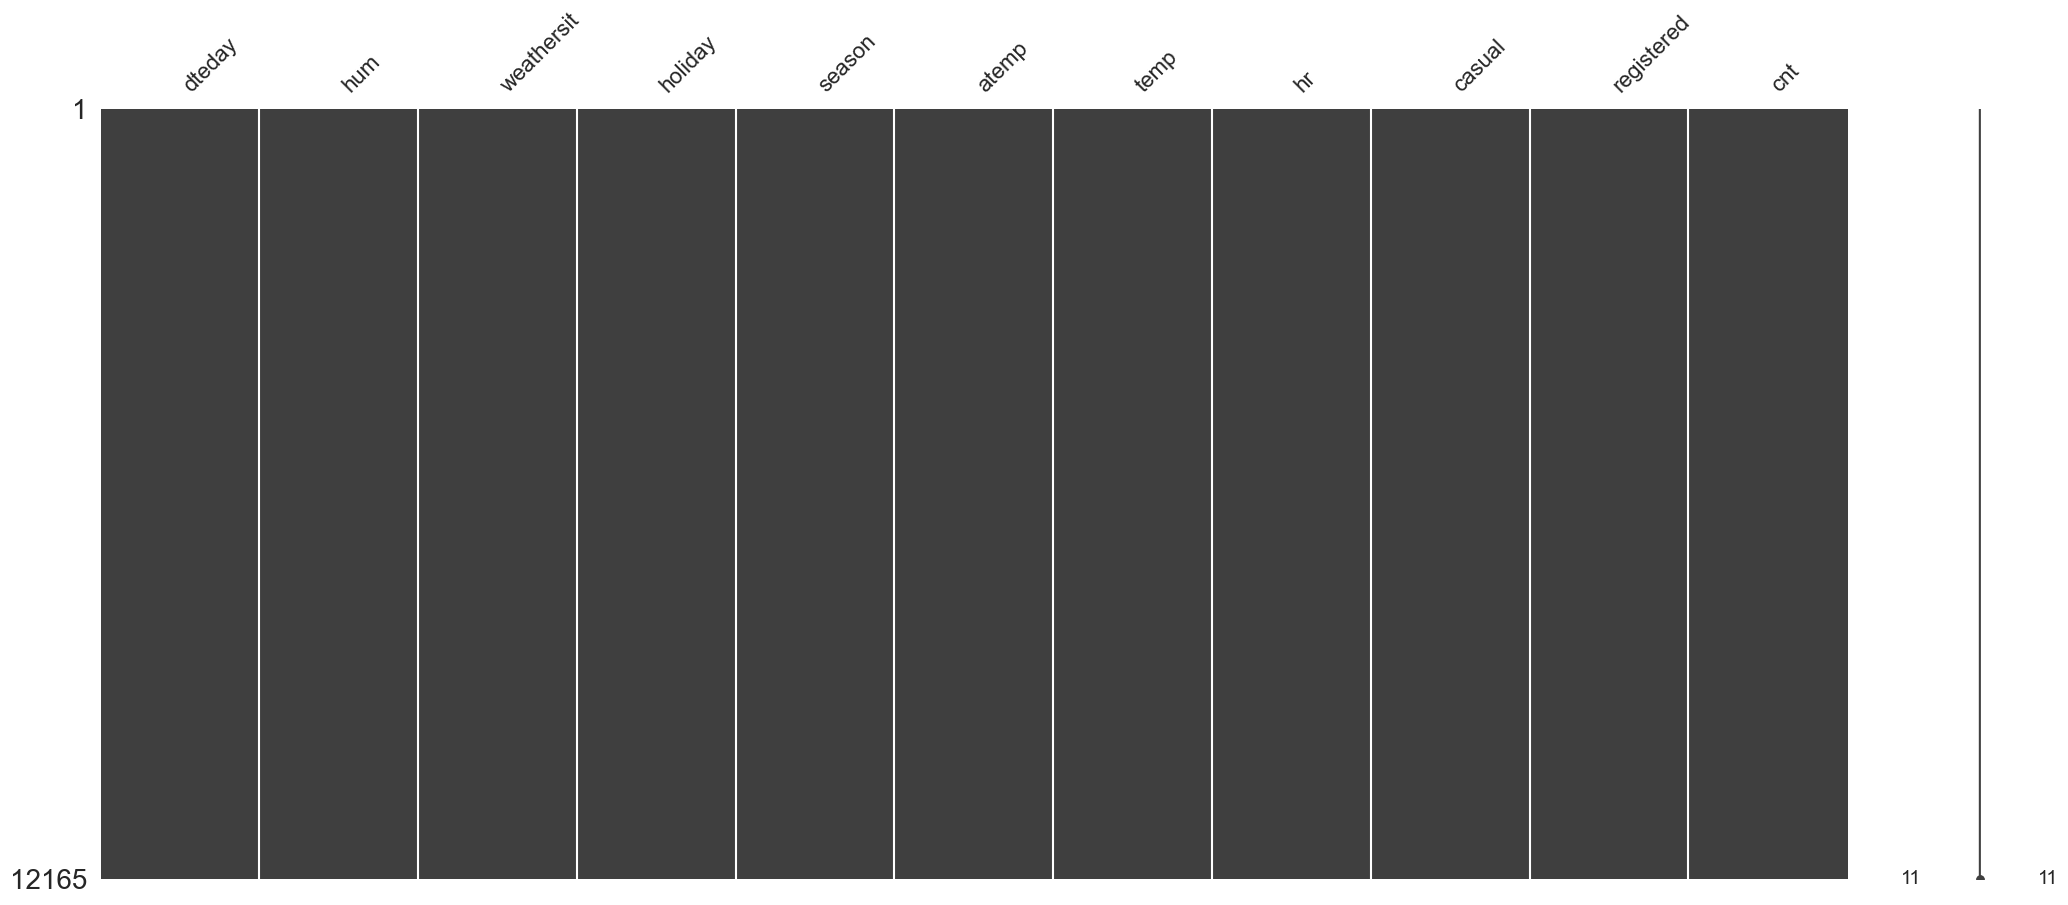

In [1636]:
msno.matrix(df)

> pada dataset ini tidak ditemukan adanya missing value ataupun data kosong yang diisi dengan constant imputer seperti "unknown" atau "?" atau "99999"

### 4. Data Duplikat

In [1637]:
# cek jumlah data duplikat
df.duplicated().sum()

np.int64(0)

> Pada dataset ini tidak terdapat data duplikat

### 5. Data Tipe

In [1638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


> kolom `dteday` merupakan kolom yang berisi data tanggal sehingga perlu diubah tipe datanya menjadi `datetime` agar sesuai dengan peran fungsionalnya dalam dataset

In [1639]:
# mengubah tipe data dteday menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# menampilkan informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


In [1640]:
# Konversi variabel kategorikal
df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['holiday'] = df['holiday'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  category      
 3   holiday     12165 non-null  category      
 4   season      12165 non-null  category      
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(3), int64(4)
memory usage: 796.6 KB


### 6. Distribusi Data

In [1641]:
# melihat distribusi data
display(df.describe())

,dteday,hum,atemp,temp,hr,casual,registered,cnt
count,12165,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,2012-01-01 02:04:45.869297408,0.625451,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
min,2011-01-01 00:00:00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 00:00:00,0.470000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,0.620000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,2012-07-03 00:00:00,0.780000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,2012-12-31 00:00:00,1.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000
std,NaN,0.192102,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903


### 7. Variabel Numerik

> Variabel numerik adalah jenis variabel yang mewakili data dalam bentuk angka, di mana nilai-nilainya memiliki makna matematis dan dapat digunakan untuk operasi aritmatika seperti penjumlahan, pengurangan, perkalian, atau pembagian. Variabel ini biasanya digunakan untuk mengukur kuantitas atau besaran.

In [1642]:
# mengambil data numerik
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk, kecuali kolom holiday, season, dan weathersit karena merupakan kategorik
numerik

,hum,atemp,temp,hr,casual,registered,cnt
0,0.62,0.3485,0.36,16,24,226,250
1,0.64,0.5152,0.54,4,2,16,18
2,0.53,0.6212,0.62,23,17,90,107
3,0.87,0.3485,0.36,8,19,126,145
4,0.55,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...
12160,0.75,0.2273,0.24,7,14,243,257
12161,0.62,0.7424,0.78,0,39,63,102
12162,0.60,0.2121,0.24,5,0,6,6
12163,0.77,0.4242,0.42,2,14,55,69


#### a. Distribusi Variabel Numerik

In [1643]:
# melihat distribusi data numerik
numerik.describe()

,hum,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


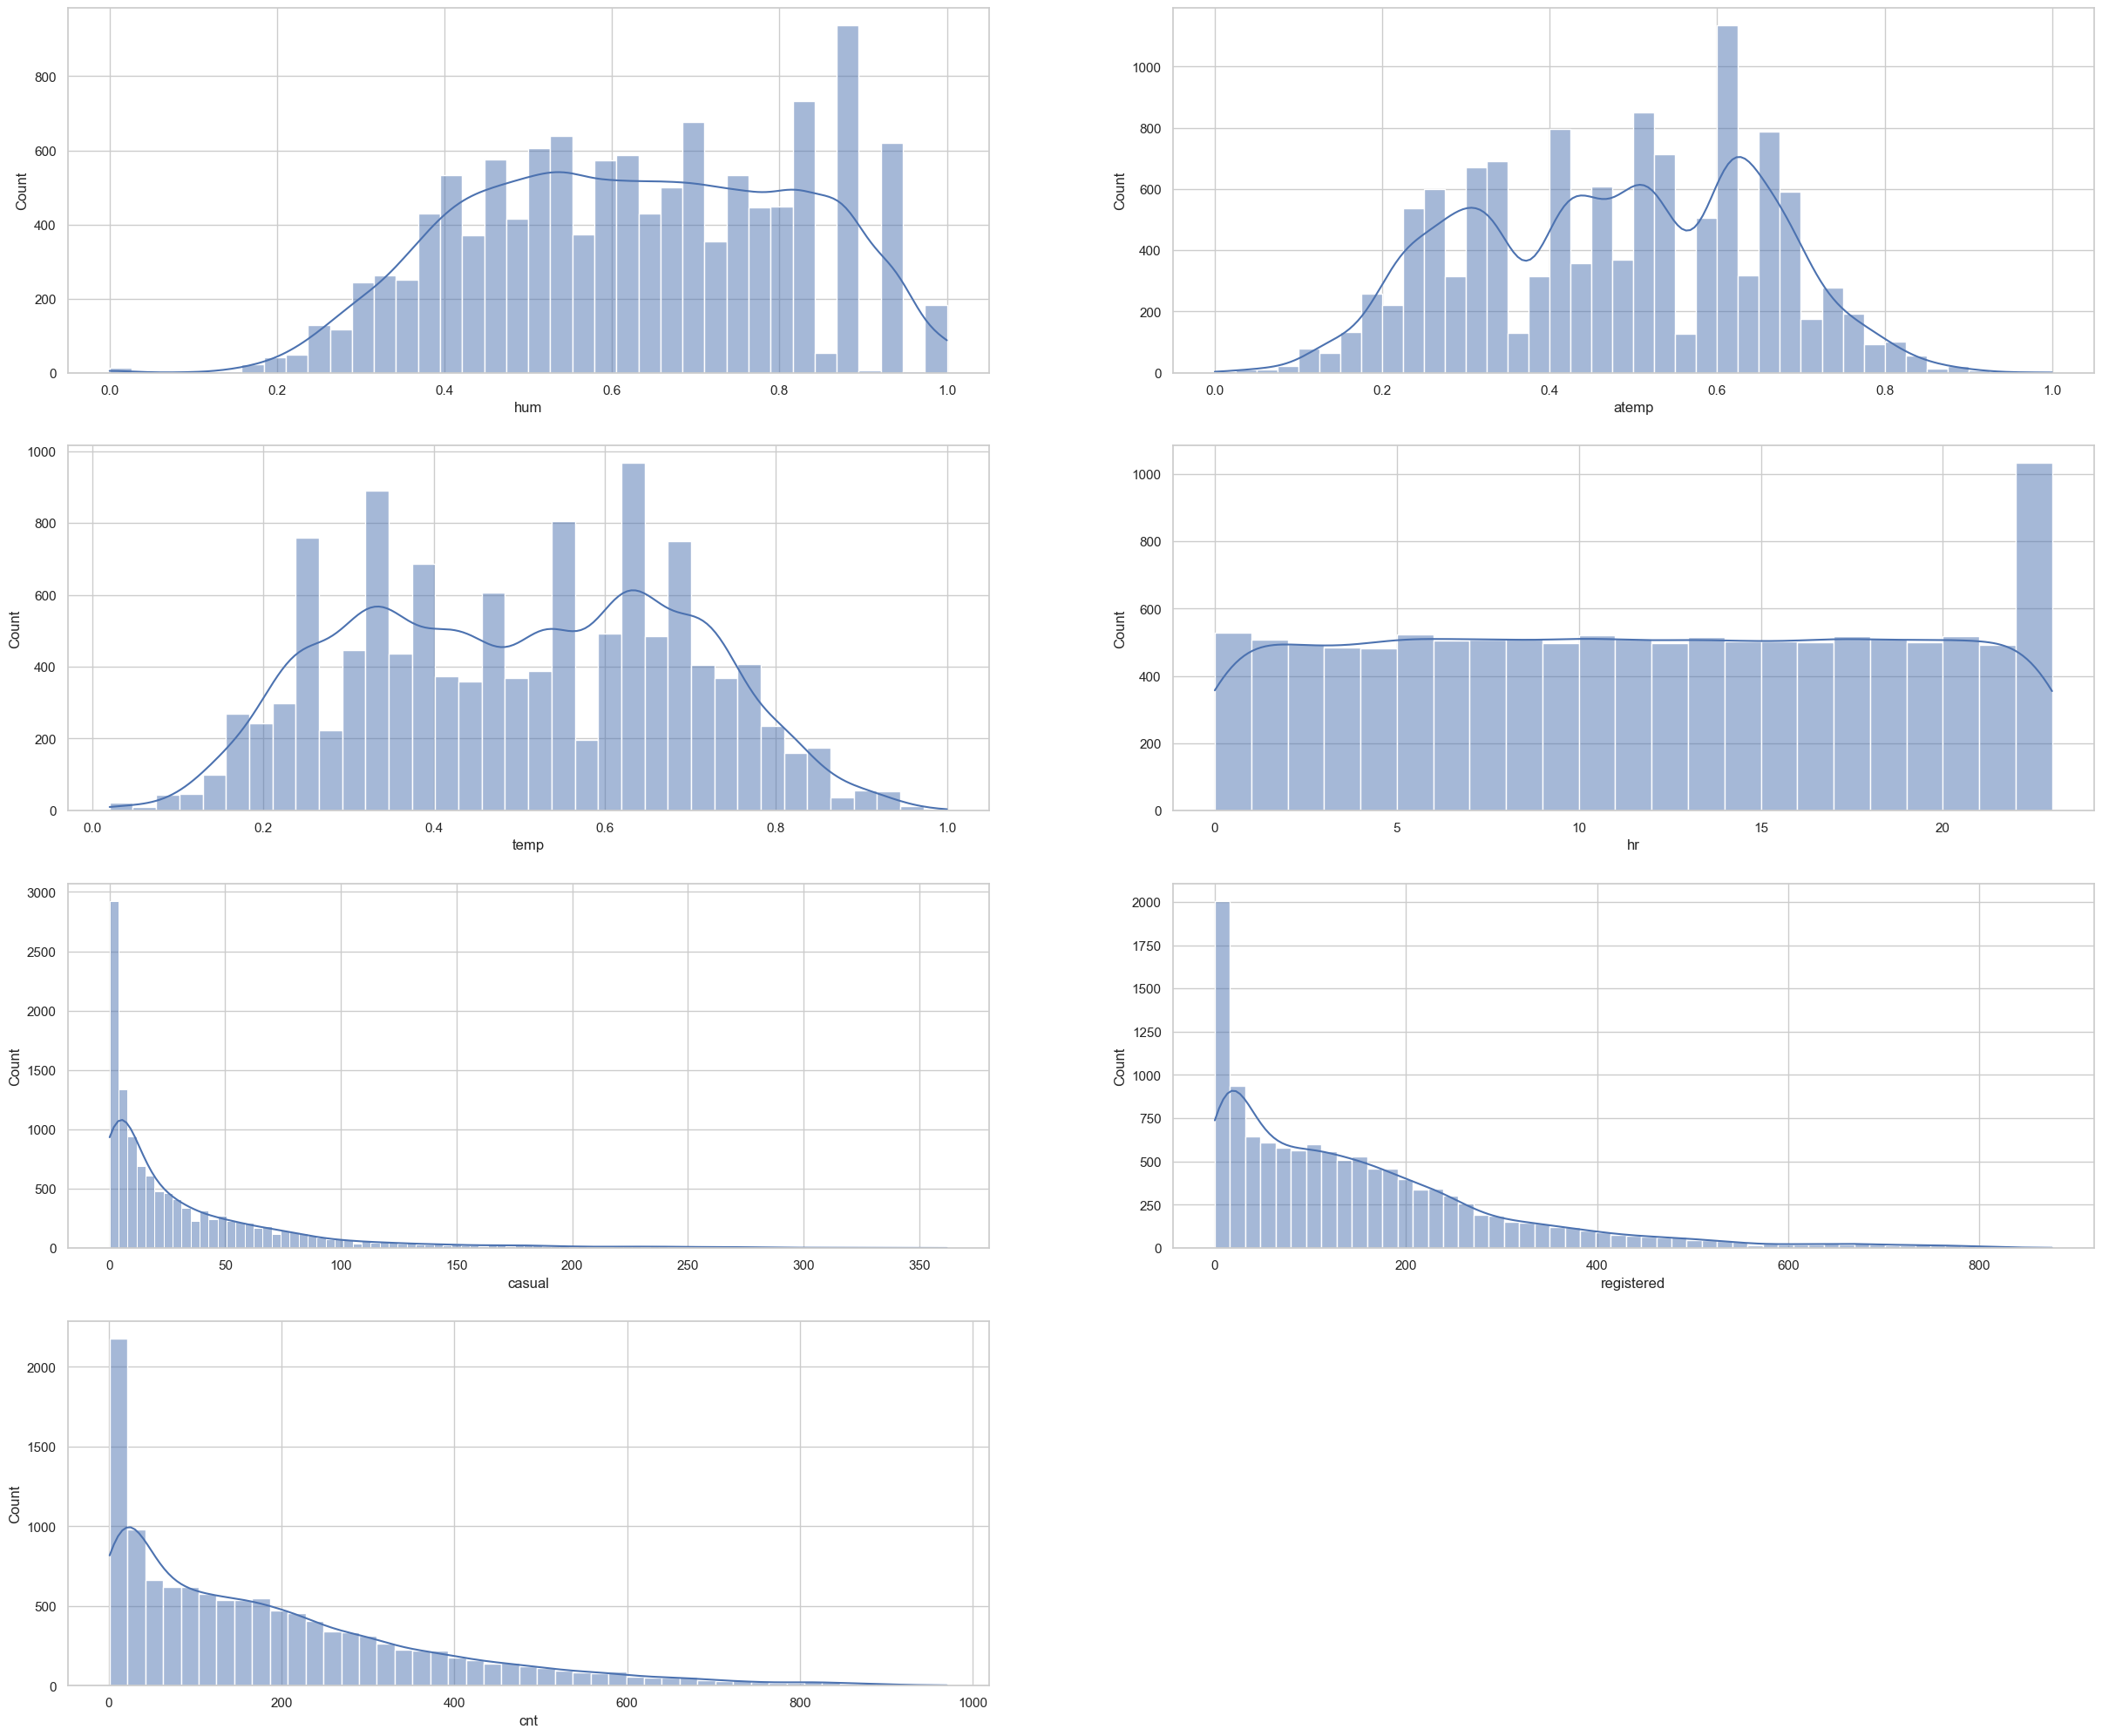

In [1644]:
# melihat distribusi data secara visual
# atur size dari figure
plt.figure(figsize = (30,25)) # kolom, baris

for posisi, nama_kolom in zip(range(1,12), numerik.columns):
    plt.subplot(4,2,posisi) # jumlah baris, jumlah kolom, posisi
    sns.histplot(df[nama_kolom], kde = True)

plt.show()

> Interpretasi Histogram Distribusi Data:
1. Distribusi kelembaban (`hum`):
kelembaban yang umum terjadi sekitar 0.6-0.8, dimana mayoritas penyewaan sepeda terjadi pada kelembaban moderat hingga tinggi (0.5-0.8). Kelembaban dapat dipertimbangkan sebagai faktor penentu perkiraan permintaan
2. Distribusi suhu (`atemp`):
suhu terkonsentrasi pada nilai 0.4-0.7 yang menunjukkan suhu yang paling nyaman untuk bersepeda.
3. Distribusi suhu aktual (`temp`):
suhu aktual memiliki pola multimodal yang mencerminkan suhu khas pada musim yang berbeda, sehingga dalam membuat perkiraan permintaan
4. Distribusi jam (`hr`):
data penyewaan terdistribusi merata di seluruh 24 jam yang menunjukkan sampling konsisten untuk setiap jam. Terdapat peningkatan di jam 23 yang merupakan anomali pola penyewaan khusus
5. Distribusi pengguna casual (`casual`):
distribusi casual sangat miring ke kanan (right-skewed) dengan konsentrasi tinggi di nilai 0-50
6. Distribusi pengguna registered (`registered`):
distribusi registered cenderung miring ke kanan tetapi dengan ekor yang lebih panjang dibanding casual, sehingga menunjukkan lebih banyak variasi dengan puncak 800+ pengguna
7. Distribusi total penyewaan (`cnt`):
distribusi total sewa cenderung miring ke kanan (mirip dengan registered) yang menunjukkan total penyewwaan sangat dipengaruhi oleh pengguna registered

#### b. Uji Normalitas Data Numerik

In [1645]:
# Selecting numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Initialize a list to store results
results = []

# Loop through each numeric column to check for normality
for col in numeric_cols:
    shapiro_stat, shapiro_p = stats.shapiro(df[col])
    ks_stat, ks_p = stats.kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    dagostino_stat, dagostino_p = stats.normaltest(df[col])

    # Append results to the list with the feature name
    results.append({
        'Column': col,
        'Test Name': 'Shapiro-Wilk',
        'Normality': "Normal" if shapiro_p > 0.05 else "Not Normal"
    })
    results.append({
        'Column': col,
        'Test Name': 'Kolmogorov-Smirnov',
        'Normality': "Normal" if ks_p > 0.05 else "Not Normal"
    })
    results.append({
        'Column': col,
        'Test Name': 'D\'Agostino\'s K^2',
        'Normality': "Normal" if dagostino_p > 0.05 else "Not Normal"
    })

# Create Dataframe from the list
normality_result = pd.DataFrame(results)
normality_result = normality_result.pivot(index='Test Name', columns='Column', values='Normality')
normality_result

Column,atemp,casual,cnt,hr,hum,registered,temp
Test Name,,,,,,,
D'Agostino's K^2,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal
Kolmogorov-Smirnov,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal
Shapiro-Wilk,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal,Not Normal


> Kesimpulan dari ketiga uji normalitas yang telah dilakukan, seluruh variabel numerik tidak terdistribusi normal

#### c. Uji Korelasi

<Axes: >

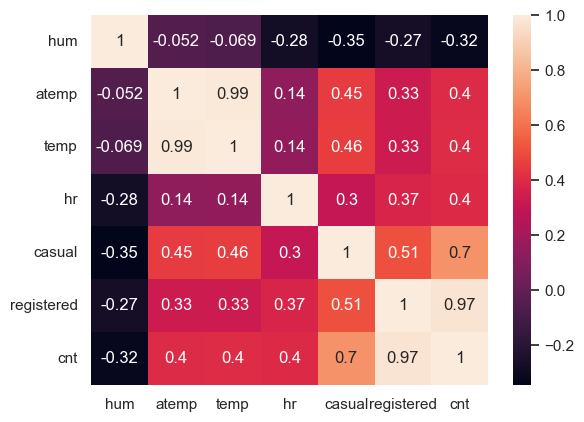

In [1646]:
sns.heatmap(df.select_dtypes(include = 'number').corr(),
            annot = True)

> Interpretasi Korelasi Variabel Numerik:
1. Cnt-Registered (0.97) dan Cnt-Casual (0.7): menunjukkan korelasi yang sangat kuat antara total sewa dengan casual dan registered, tetapi registered merupakan kontributor utama terhadap total sewa
2. Casual-Registered (0.51) : menunjukkan adanya korelasi positif moderat antara jumlah pengguna casual dan registered sehingga dapat dikatakan bahwa faktor yang memengaruhi keduanya sama
3. Temp/Atemp-Casual (0.46/0.45) dan Temp/Atemp-Registered (0.33/0.33) : pengaruh suhu pada pegguna registered lebih lemah dibanding casual, menunukkan bahwa segmen casual lebih dipengaruhi oleh faktor cuaca (sensitif terhadap suhu)
4. Hum-Casual (-0.35) dan Hum-Registered(-0.27) : kelembaban tinggi menunjukkan penurunan jumlah penyewa, dengan pengaruh lebih sensitif pada pengguna casual
5. Hr-Casual (0.3) dan Hr-Registered (0.37) : jam hari memiliki pengaruh moderay pada jumlah penyewaan dengan pengaruh yang sedikit lebih kuat pada pengguna registered

#### d. Uji Multikolinearitas

In [1647]:
# Cek multicollinearity dengan VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Kalkulasi VIF
vif_table = calculate_vif(df[numerik.columns])

print("Nilai VIF dari setiap fitur:")
vif_table

Nilai VIF dari setiap fitur:


,Features,VIF
0,hum,6.601652
1,atemp,338.496948
2,temp,306.390765
3,hr,3.851126
4,casual,inf
5,registered,inf
6,cnt,inf


> kolom `temp` dan `atemp` memiliki nilai VIF yang tinggi, menunjukkan multikolinearitas yang sangat tinggi karena keduanya mengukur variabel yang hampir sama (suhu aktual dan suhu yang dirasakan pengguna). Nilai ini akan memengaruhi koefisien regresi sehingga disarankan untuk dihapus salah satu. Variabel `atemp` merupakan variabel yang lebih merepresentasikan pengalaman pengguna, sehingga variabel `temp` yang dihapus.

In [1648]:
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk, kecuali kolom holiday, season, dan weathersit karena merupakan kategorik
numerik

,hum,atemp,temp,hr,casual,registered,cnt
0,0.62,0.3485,0.36,16,24,226,250
1,0.64,0.5152,0.54,4,2,16,18
2,0.53,0.6212,0.62,23,17,90,107
3,0.87,0.3485,0.36,8,19,126,145
4,0.55,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...
12160,0.75,0.2273,0.24,7,14,243,257
12161,0.62,0.7424,0.78,0,39,63,102
12162,0.60,0.2121,0.24,5,0,6,6
12163,0.77,0.4242,0.42,2,14,55,69


In [1649]:
# drop kolom 'atemp' dari variabel numerik
df.drop(columns = ['temp'], inplace = True)

In [1650]:
numerik = df.select_dtypes(include='number') # yg mengandung integer dan float akan masuk, kecuali kolom holiday, season, dan weathersit karena merupakan kategorik
numerik

,hum,atemp,hr,casual,registered,cnt
0,0.62,0.3485,16,24,226,250
1,0.64,0.5152,4,2,16,18
2,0.53,0.6212,23,17,90,107
3,0.87,0.3485,8,19,126,145
4,0.55,0.6970,18,99,758,857
...,...,...,...,...,...,...
12160,0.75,0.2273,7,14,243,257
12161,0.62,0.7424,0,39,63,102
12162,0.60,0.2121,5,0,6,6
12163,0.77,0.4242,2,14,55,69


In [1651]:
# Cek multicollinearity dengan VIF setelah kolom 'temp' di-drop
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Features"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Kalkulasi VIF
vif_table = calculate_vif(df[numerik.columns])

print("Nilai VIF setelah handle multicollinearity:")
vif_table

Nilai VIF setelah handle multicollinearity:


,Features,VIF
0,hum,6.156437
1,atemp,9.310273
2,hr,3.838350
3,casual,inf
4,registered,inf
5,cnt,inf


> Setelah kolom `temp` dihapus, nilai VIF variabel `atemp` sudah di bawah 10 yang menunjukkan multikolinearitas ekstrem berhasil di handle.

#### e. Outliers

Outliers merupakan nilai dalam dataset yang jauh berbeda atau menyimpang secara signifikan dari sebagian besar data lainnya. Dalam istilah statistik, outliers sering dianggap sebagai pengamatan "ekstrem" yang tidak mengikuti pola umum distribusi data. Pengecekan data outliers berfungsi untuk mengidentifikasi nilai ekstrem yang berpotensi mempengaruhi analisis data secara signifikan. Metode yang digunakan untuk mendeteksi outliers adalah IQR (Interquartile Range) karena data terdistribusi tidak normal, lalu divisualisasikan dengan boxplot.

##### IQR
IQR dilakukan dengan menentukan batas kuartil pertama (Q1) dan kuartil ketiga (Q3), lalu dihitung batas atas dan bawahnya. Suatu data dideteksi sebagai outliers ketika melebihi batas atas (Q3 + 1,5 * IQR) dan batas bawah (Q1 + 1,5 * IQR).

In [1652]:
for nama_kolom in numerik.columns:
    q3 = df[nama_kolom].quantile(0.75)
    q1 = df[nama_kolom].quantile(0.25)
    iqr = q3 - q1
    batas_atas = q3 + (iqr * 1.5)
    batas_bawah = q1 - (iqr * 1.5)
    jumlah_outliers = len(df[(df[nama_kolom] > batas_atas) | (df[nama_kolom] < batas_bawah)])
    print(f'Jumlah Outliers {nama_kolom}: {jumlah_outliers}')

Jumlah Outliers hum: 14
Jumlah Outliers atemp: 0
Jumlah Outliers hr: 0
Jumlah Outliers casual: 847
Jumlah Outliers registered: 470
Jumlah Outliers cnt: 338


##### Boxplot
Boxplot merupakan metode visualisasi data yang menunjukkan outliers sebagai titik di luar 'whiskers' (rentang data)

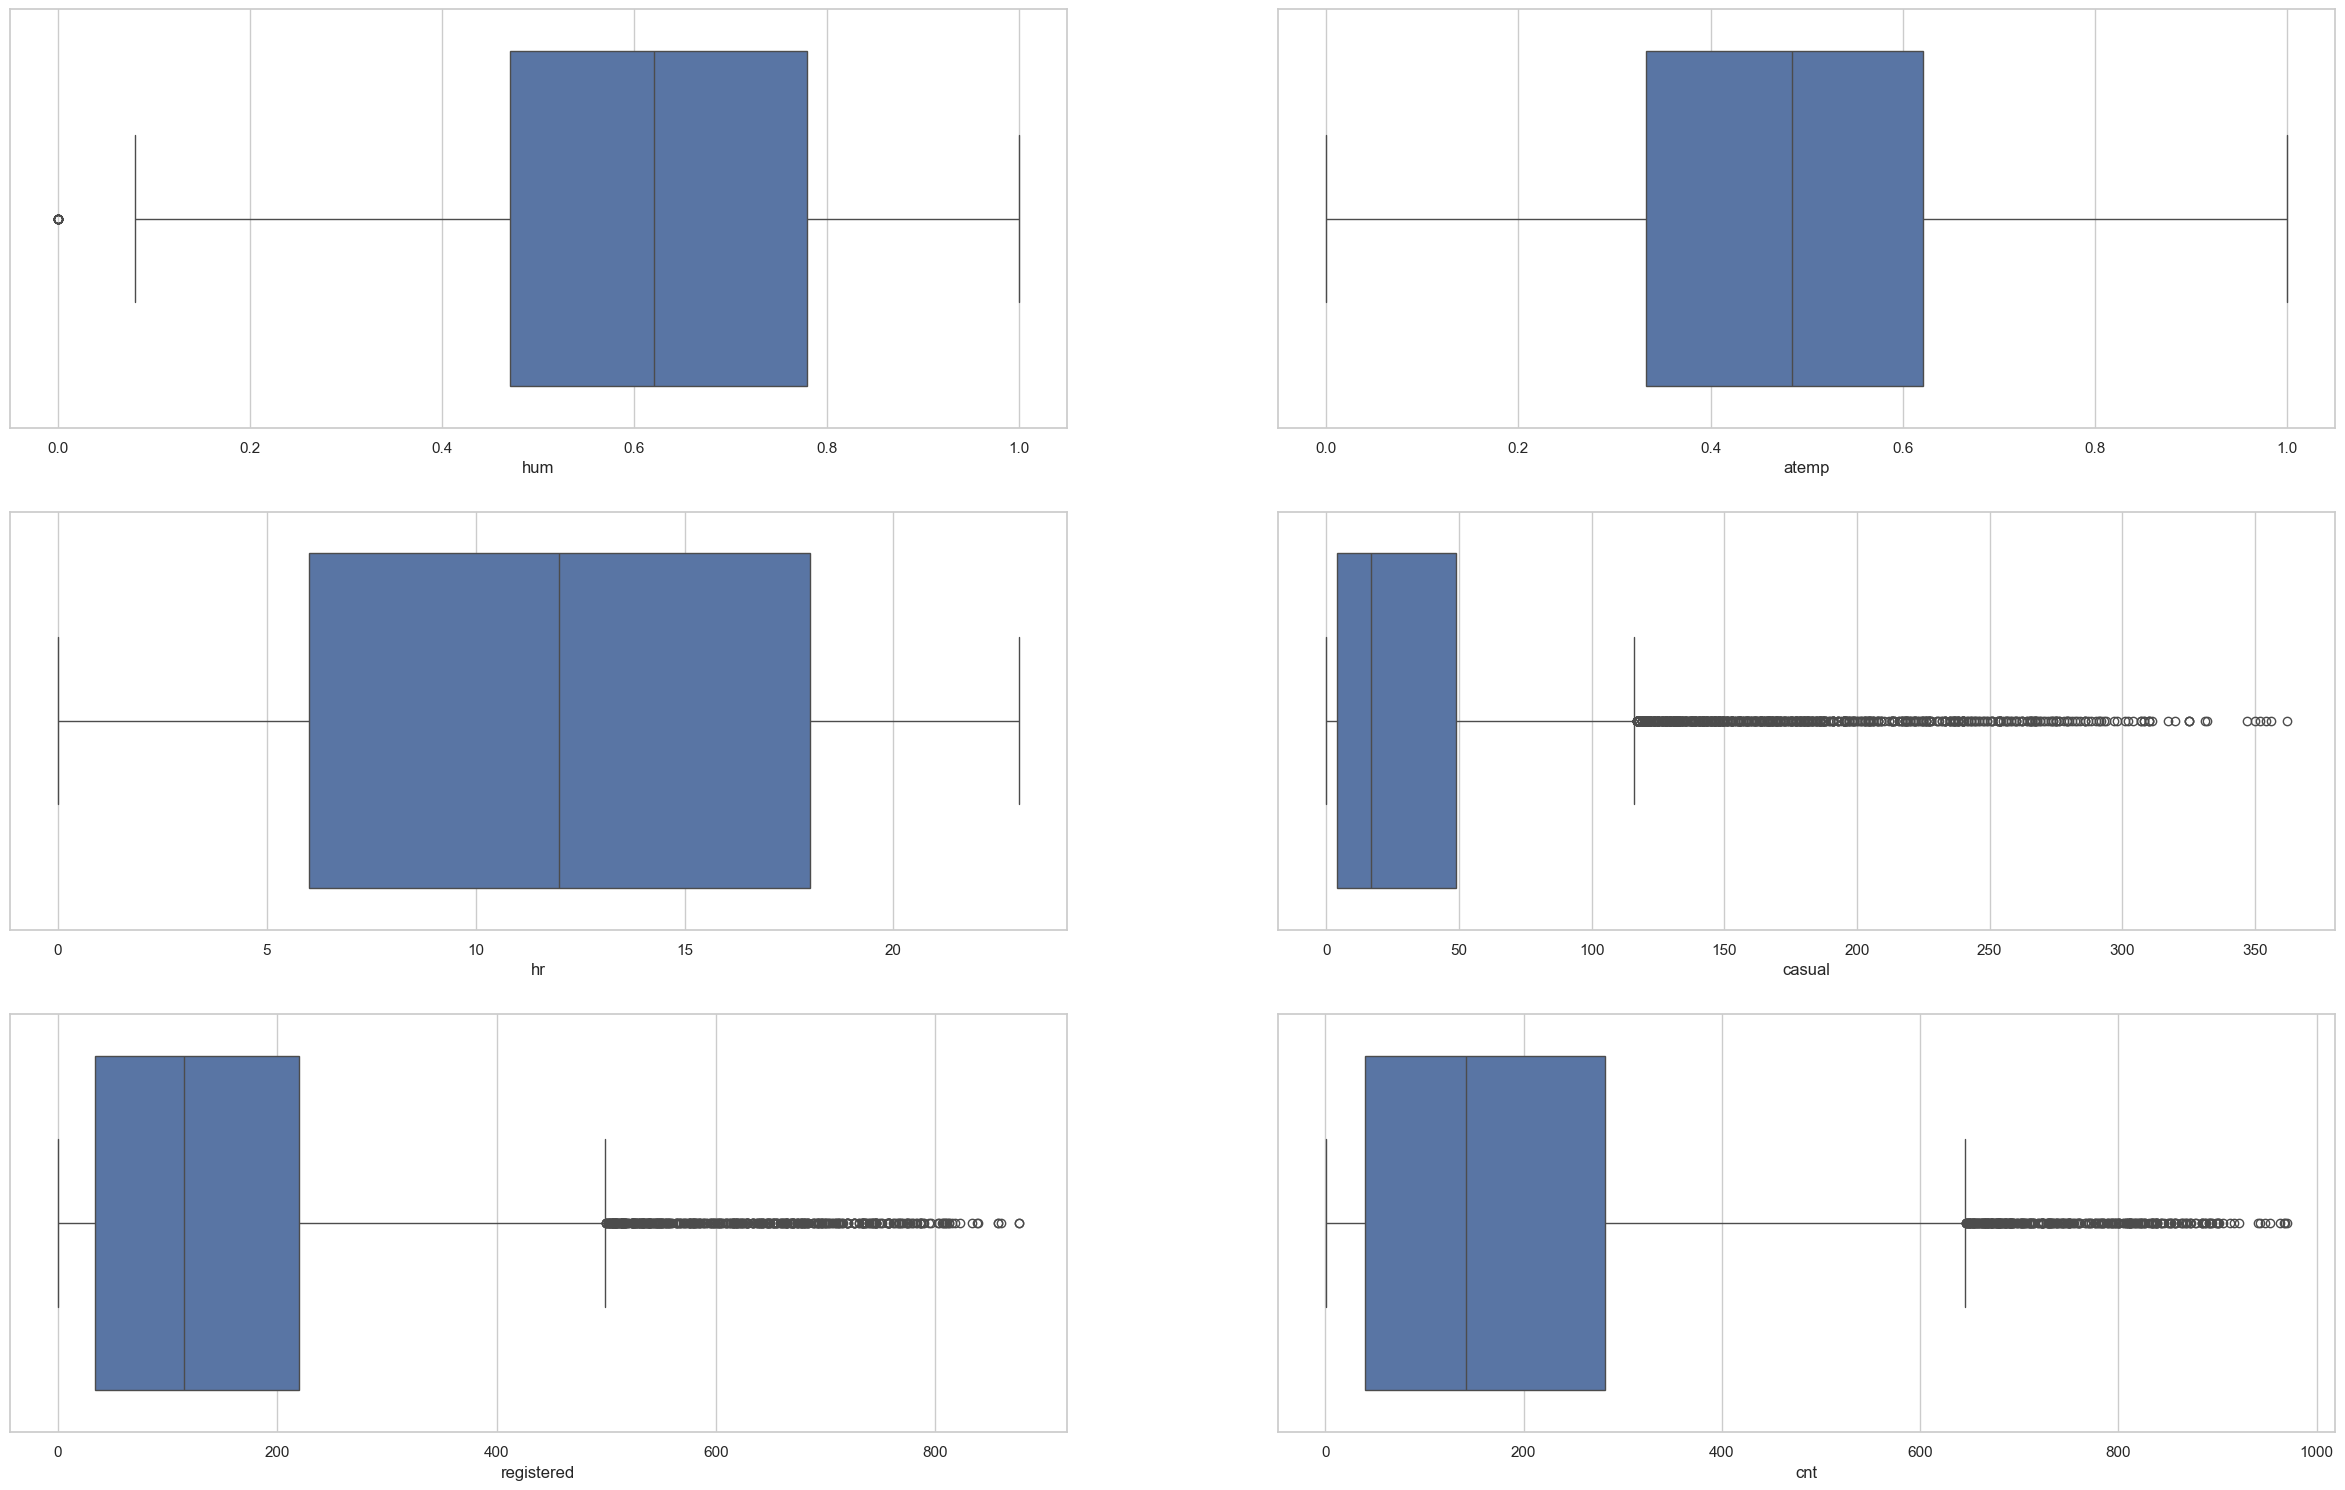

In [1653]:
# atur size dari figure
plt.figure(figsize = (30,25)) # kolom, baris

for posisi, nama_kolom in zip(range(1,12), numerik.columns): # posisi 1 sampai 12
    plt.subplot(4,2,posisi) # jumlah baris, jumlah kolom, posisi
    sns.boxplot(x = df[nama_kolom])

plt.show()

> Interpretasi Outliers:
1. Kelembaban (`hum`) : menunjukkan adanya kondisi penyewaan pada kelembaban yang sangat kering atau sangat lembab, tetapi jumlahnya relatif kecil (0.12% dari total data) sehingga tidak terlalu mempengaruhi analisis.
2. Pengguna casual : menunjukkan adanya hari dengan jumlah casual yang sangat tinggi (ekstrem), misalnya ada acara khusus, liburan atau kondisi cuaca yang sangat ideal. Jumlah outliers ini sangat signifikan (sekitar 7% dari total data) sehingga perlu di handle agar tidak mengacaukan model regresi.
3. Pengguna registered : menunjukkan adanya hari dengan jumlah registered yang jauh di atas normal, ada kemungkinan terjadi karena hari sibuk atau acara khusus. Jumlah outliers ini cukup signifikan (sekitar 3.9% dari total data).
4. Total sewa (`cnt`) : menunjukkan adanya hari-hari tertentu yang memiliki total penyewaan sangat tinggi akibat dipengaruhi pengguna registered dan casual yang tinggi.


Pada analisis ini, outliers sementara akan dibiarkan dan dijadikan bagian dari eksperimen analisis

### 8. Variabel Kategorik

Variabel kategorik adalah jenis variabel yang mewakili data dalam bentuk kategori atau kelompok, bukan nilai numerik kontinu. Variabel ini biasanya digunakan untuk mengelompokkan data berdasarkan karakteristik tertentu, dan nilai-nilainya tidak memiliki urutan numerik yang bermakna (meskipun dalam beberapa kasus ada urutan ordinal).

In [1654]:
# ambil yang kategorik saja 'holiday', 'season', 'weathersit', 'dteday'
kategorik = df[['holiday', 'season', 'weathersit', 'dteday']]
kategorik

,holiday,season,weathersit,dteday
0,0,4,1,2011-12-09
1,0,2,1,2012-06-17
2,0,2,1,2011-06-15
3,0,2,2,2012-03-31
4,0,3,1,2012-07-31
...,...,...,...,...
12160,0,1,1,2012-01-25
12161,0,3,1,2012-07-06
12162,1,1,2,2012-02-20
12163,0,2,2,2012-03-31


In [1655]:
# melihat distribusi data kategorik
kategorik.describe()

,dteday
count,12165
mean,2012-01-01 02:04:45.869297408
min,2011-01-01 00:00:00
25%,2011-07-02 00:00:00
50%,2012-01-02 00:00:00
75%,2012-07-03 00:00:00
max,2012-12-31 00:00:00


In [1656]:
# hitung unique values data kategorik
kategorik.nunique()

holiday         2
season          4
weathersit      4
dteday        731
dtype: int64

In [1657]:
df.holiday.value_counts()

holiday
0    11803
1      362
Name: count, dtype: int64

berdasarkan kolom `holiday`, diketahui bahwa penyewaan sepeda lebih banyak dilakukan pada waktu non-holiday (0)

In [1658]:
df.season.value_counts()

season
3    3169
2    3074
1    3023
4    2899
Name: count, dtype: int64

berdasarkan kolom `season`, diketahui bahwa penyewaan sepeda lebih banyak dilakukan pada season 3 (musim panas)

In [1659]:
df.weathersit.value_counts()

weathersit
1    8071
2    3119
3     972
4       3
Name: count, dtype: int64

berdasarkan kolom `weathersit`, diketahui bahwa penyewaan sepeda lebih banyak dilakukan pada cuaca 1 (cerah, sedikit berawan)

In [1660]:
df.dteday.value_counts().head(10)

dteday
2011-08-09    22
2011-02-01    22
2012-03-02    22
2012-09-29    22
2011-05-26    22
2012-07-04    22
2012-07-07    22
2011-08-17    22
2012-07-08    22
2011-08-31    21
Name: count, dtype: int64

In [1661]:
# Cek periode waktu dalam dataset
print("\nRentang waktu data:")
print("Tanggal awal:", df['dteday'].min())
print("Tanggal akhir:", df['dteday'].max())
print("Total durasi:", df['dteday'].max() - df['dteday'].min())


Rentang waktu data:
Tanggal awal: 2011-01-01 00:00:00
Tanggal akhir: 2012-12-31 00:00:00
Total durasi: 730 days 00:00:00


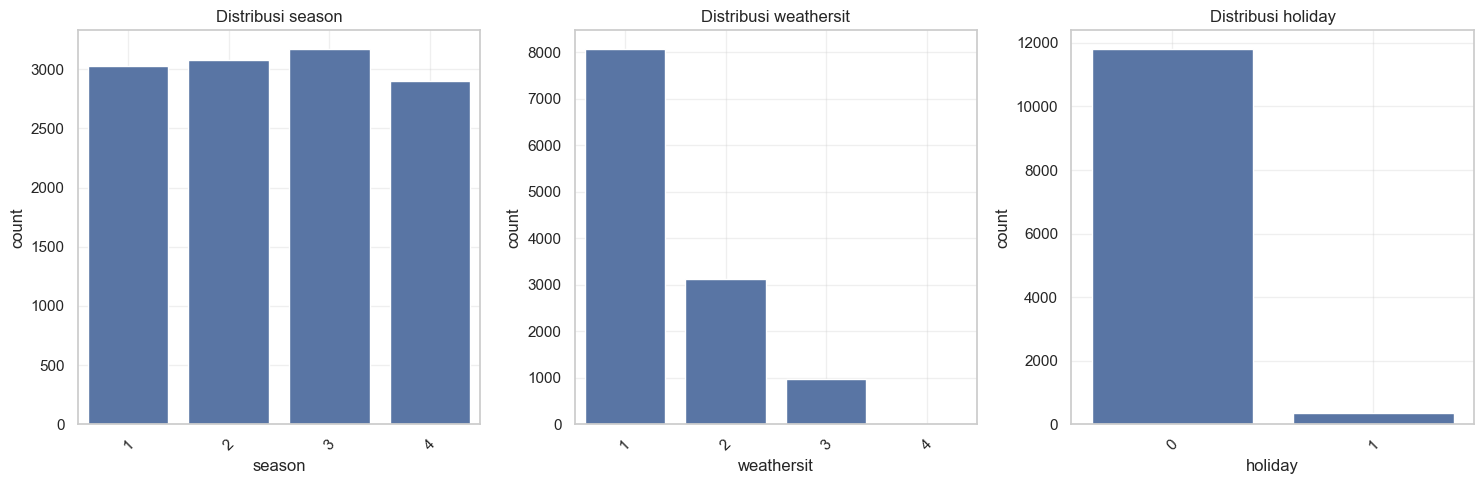

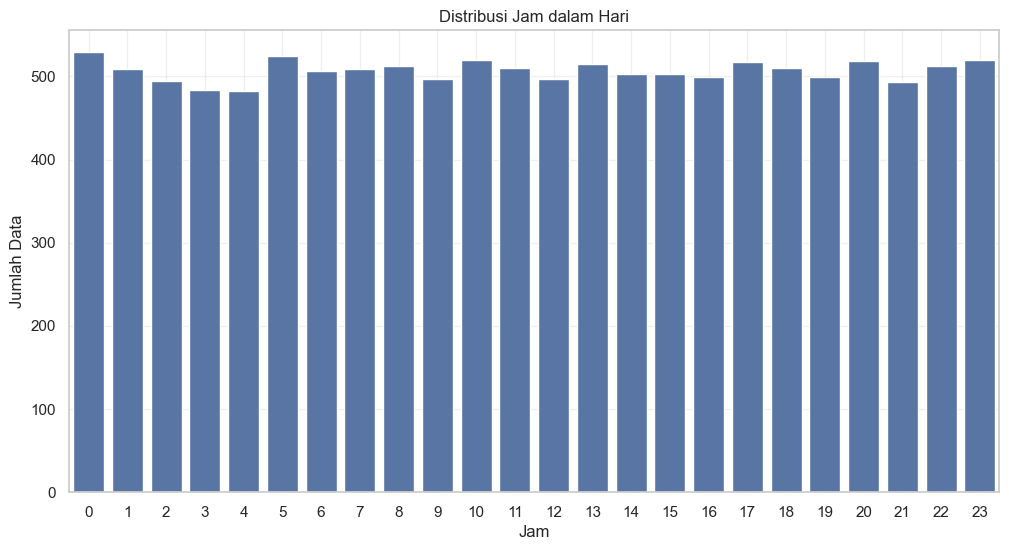

In [1662]:
# Distribusi variabel kategorikal
cat_vars = ['season', 'weathersit', 'holiday']

plt.figure(figsize=(15, 5))
for i, var in enumerate(cat_vars):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=var)
    plt.title(f'Distribusi {var}')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('categorical_distributions.png')
plt.show()

# Distribusi jam dalam hari
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='hr')
plt.title('Distribusi Jam dalam Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Data')
plt.grid(True, alpha=0.3)
plt.savefig('hour_distribution.png')
plt.show()

1. **Pola Penggunaan Berdasarkan Jam**:
    - Pengguna **Registered** mendominasi pada jam sibuk pagi (7-9) dan sore (17-18), menunjukkan bahwa layanan ini sangat relevan untuk komuter.
    - Pengguna **Casual** lebih aktif di siang hari (10-16), mencerminkan penggunaan untuk rekreasi atau aktivitas santai.
    - **Strategi Bisnis**: Fokuskan alokasi sepeda pada jam sibuk untuk pengguna registered dan siang hari untuk pengguna casual.

2. **Pola Penggunaan Berdasarkan Hari**:
    - Pengguna **Casual** meningkat signifikan pada akhir pekan, terutama Sabtu, menunjukkan potensi pasar rekreasi.
    - Pengguna **Registered** stabil pada hari kerja, menurun pada akhir pekan.
    - **Strategi Bisnis**: Tingkatkan promosi akhir pekan untuk casual dan optimalkan layanan hari kerja untuk registered.

3. **Pola Penggunaan Berdasarkan Bulan/Musim**:
    - Aktivitas tertinggi terjadi pada musim panas (Juni-Agustus), terutama untuk pengguna casual.
    - Aktivitas menurun signifikan pada musim dingin.
    - **Strategi Bisnis**: Maksimalkan pendapatan dengan promosi musiman di musim panas dan strategi retensi pengguna registered di musim dingin.

4. **Hubungan Faktor Eksternal**:
    - Suhu dan kelembaban memengaruhi pengguna casual lebih signifikan dibanding registered.
    - **Strategi Bisnis**: Sesuaikan prediksi permintaan dengan kondisi cuaca untuk mengoptimalkan alokasi sepeda.

### 9. Visualisasi 

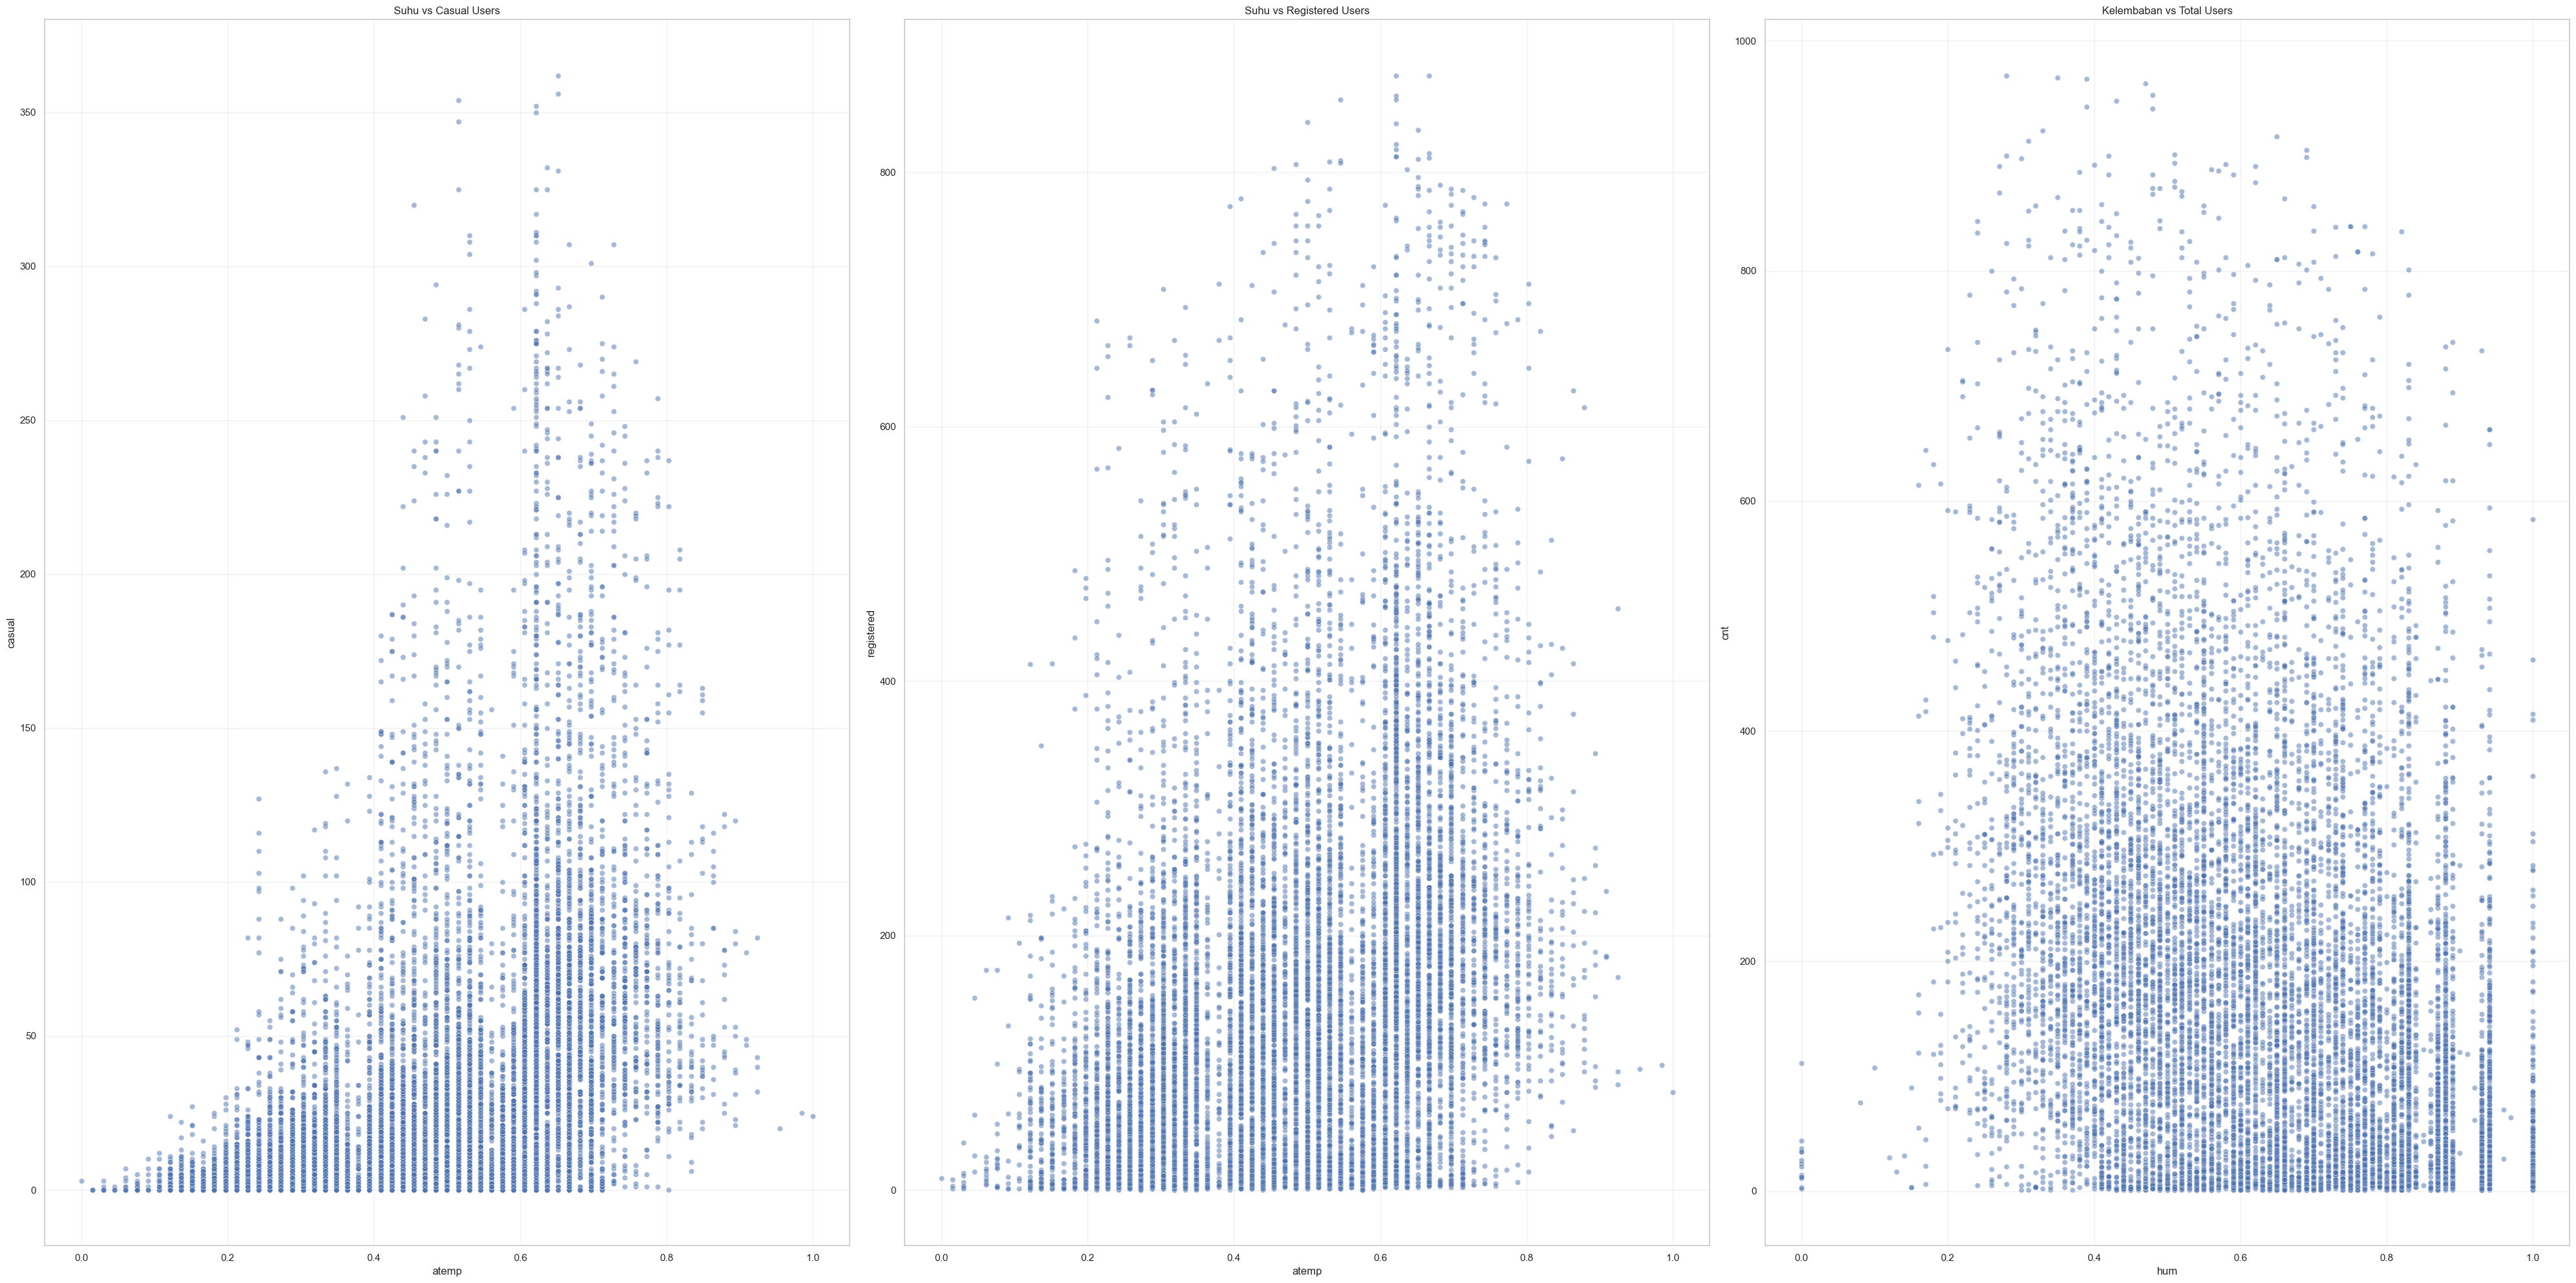

In [1663]:
# Scatter plot untuk pasangan variabel penting
plt.figure(figsize=(40, 20))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='atemp', y='casual', alpha=0.5)
plt.title('Suhu vs Casual Users')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='atemp', y='registered', alpha=0.5)
plt.title('Suhu vs Registered Users')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='hum', y='cnt', alpha=0.5)
plt.title('Kelembaban vs Total Users')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

> Interpretasi dari visualisasi scatter plot:

1. **Suhu vs Casual Users**:
    - Terdapat hubungan positif antara suhu (`atemp`) dan jumlah pengguna casual. Ketika suhu meningkat, jumlah pengguna casual juga cenderung meningkat.
    - Hal ini menunjukkan bahwa pengguna casual lebih cenderung menggunakan sepeda pada kondisi cuaca yang lebih hangat, yang biasanya lebih nyaman untuk aktivitas rekreasi.

2. **Suhu vs Registered Users**:
    - Hubungan antara suhu (`atemp`) dan jumlah pengguna registered juga positif, tetapi lebih lemah dibandingkan dengan pengguna casual.
    - Pengguna registered tampaknya lebih konsisten dalam menggunakan sepeda, meskipun suhu tidak terlalu ideal. Hal ini menunjukkan bahwa pengguna registered lebih cenderung menggunakan sepeda untuk kebutuhan rutin seperti perjalanan kerja.

3. **Kelembaban vs Total Users**:
    - Hubungan antara kelembaban (`hum`) dan total pengguna (`cnt`) menunjukkan pola yang lebih kompleks. Pada kelembaban moderat, jumlah pengguna cenderung lebih tinggi, sedangkan pada kelembaban yang sangat rendah atau sangat tinggi, jumlah pengguna menurun.
    - Hal ini menunjukkan bahwa kondisi kelembaban ekstrem (sangat kering atau sangat lembab) dapat mengurangi kenyamanan pengguna sepeda, sehingga memengaruhi jumlah total penyewaan.

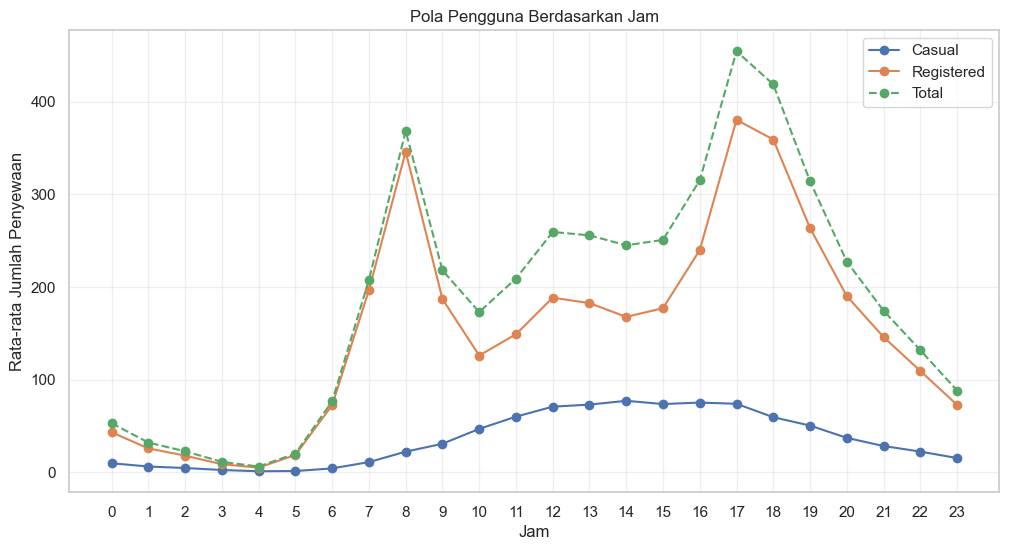

In [1664]:
# Pola penggunaan berdasarkan jam
hourly_data = df.groupby('hr').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_data['hr'], hourly_data['casual'], marker='o', label='Casual')
plt.plot(hourly_data['hr'], hourly_data['registered'], marker='o', label='Registered')
plt.plot(hourly_data['hr'], hourly_data['cnt'], marker='o', linestyle='--', label='Total')
plt.title('Pola Pengguna Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

1. Pola Umum
    - Casual (Biru): Pengguna kasual menunjukkan puncak penggunaan yang lebih kecil dan terdistribusi secara merata di siang hari, dengan peningkatan mulai dari jam 7 pagi hingga puncak sekitar jam 12-15 siang, lalu menurun hingga malam.
    - Registered (Orange): Pengguna terdaftar memiliki dua puncak utama: satu di pagi hari (sekitar jam 7-9) dan satu lagi di sore hari (sekitar jam 16-18), yang mencerminkan pola perjalanan kerja. Penggunaan menurun drastis setelah jam 19.
    - Kontribusi terhadap Total: Registered mendominasi total penggunaan di jam sibuk (pagi dan sore), sedangkan Casual lebih signifikan di jam tengah hari dan malam.


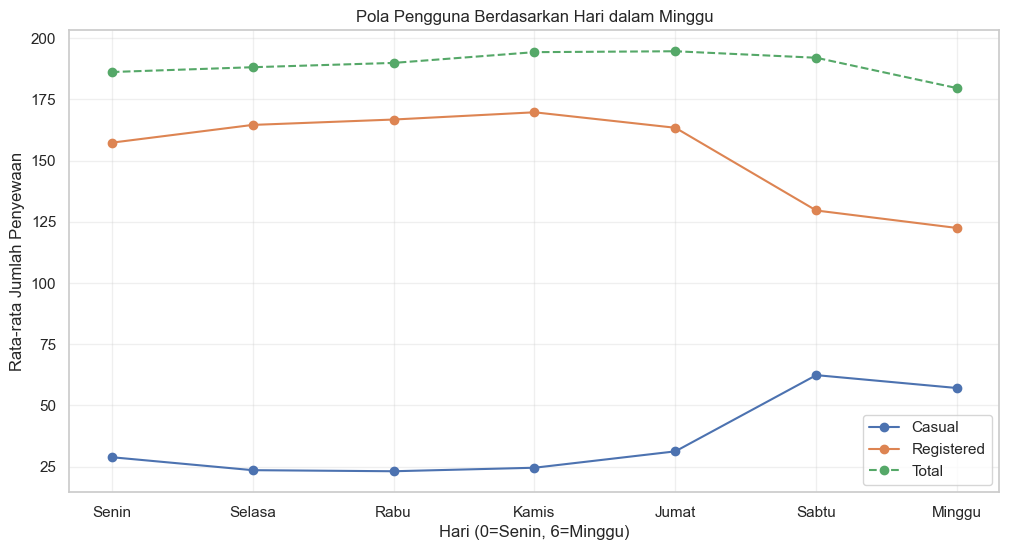

In [1665]:
# Pola penggunaan berdasarkan hari dalam minggu

# membuat kolom baru untuk hari dalam minggu
df['day_of_week'] = df['dteday'].dt.dayofweek

daily_data = df.groupby('day_of_week').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_data['day_of_week'], daily_data['casual'], marker='o', label='Casual')
plt.plot(daily_data['day_of_week'], daily_data['registered'], marker='o', label='Registered')
plt.plot(daily_data['day_of_week'], daily_data['cnt'], marker='o', linestyle='--', label='Total')
plt.title('Pola Pengguna Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari (0=Senin, 6=Minggu)')
plt.xticks(range(0, 7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

1. Pola Umum
    - Casual (Biru): Pengguna kasual menunjukkan peningkatan yang signifikan menjelang akhir pekan (Jumat hingga Minggu), dengan puncak tertinggi pada hari Sabtu. Penggunaan terendah terjadi pada hari Rabu.
    - Registered (Oranye): Pengguna terdaftar memiliki pola yang lebih stabil sepanjang minggu, dengan puncak pada hari Rabu dan Kamis, lalu menurun tajam pada akhir pekan (Sabtu dan Minggu).

2. Pola Penggunaan Berdasarkan Hari:
    - Hari Kerja (Senin-Kamis): Penggunaan sepeda didominasi oleh pengguna Registered, dengan puncak pada hari Rabu dan Kamis. Pengguna Casual sangat rendah pada hari-hari ini, menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan komuter.
    - Akhir Pekan (Jumat-Minggu): Penggunaan Casual meningkat tajam, dengan puncak pada hari Sabtu, sementara pengguna Registered menurun. Ini menunjukkan pergeseran penggunaan dari komuter ke rekreasi di akhir pekan.

3. Perbandingan Casual vs. Registered
    - Casual: Penggunaan meningkat signifikan pada akhir pekan (Jumat-Minggu), dengan puncak pada hari Sabtu. Ini menunjukkan bahwa pengguna kasual lebih aktif untuk aktivitas rekreasi atau santai di akhir pekan.
    - Registered: Penggunaan lebih tinggi dan konsisten pada hari kerja (Senin-Kamis), dengan penurunan tajam pada akhir pekan. Ini mencerminkan pola komuter yang menggunakan sepeda untuk perjalanan kerja.
    - Kontribusi terhadap Total: Registered mendominasi total penggunaan pada hari kerja, sedangkan Casual menjadi lebih signifikan pada akhir pekan. Total penggunaan tetap relatif stabil karena pola yang berlawanan ini saling mengimbangi.

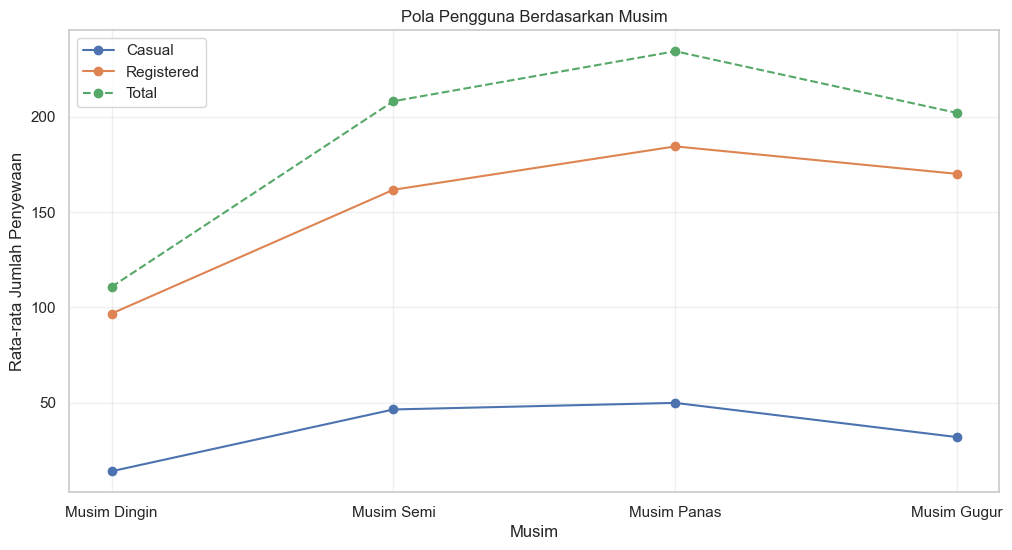

In [1666]:
# buat visualisasi penggunaan berdasarkan season
seasonal_data = df.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
}).reset_index()


plt.figure(figsize=(12, 6))
plt.plot(seasonal_data['season'], seasonal_data['casual'], marker='o', label='Casual')
plt.plot(seasonal_data['season'], seasonal_data['registered'], marker='o', label='Registered')
plt.plot(seasonal_data['season'], seasonal_data['cnt'], marker='o', linestyle='--', label='Total')
plt.title('Pola Pengguna Berdasarkan Musim')
plt.xlabel('Musim')
plt.xticks(range(1, 5), ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Berikut adalah interpretasi dari hasil visualisasi pola penggunaan berdasarkan musim:

1. **Pengguna Casual**:
    - Pengguna casual menunjukkan peningkatan signifikan selama musim semi dan musim panas (musim 2 dan 3), dengan puncak tertinggi pada musim panas. Hal ini menunjukkan bahwa pengguna casual lebih cenderung menggunakan sepeda untuk aktivitas rekreasi selama cuaca hangat.
    - Penurunan penggunaan terjadi selama musim dingin (musim 1), yang kemungkinan besar disebabkan oleh cuaca dingin yang kurang mendukung aktivitas luar ruangan.

2. **Pengguna Registered**:
    - Pengguna registered memiliki pola yang lebih stabil sepanjang musim, tetapi tetap menunjukkan peningkatan selama musim semi dan musim panas. Hal ini menunjukkan bahwa pengguna registered lebih konsisten dalam menggunakan sepeda, terlepas dari musim, meskipun mereka juga lebih aktif selama cuaca hangat.
    - Penurunan penggunaan juga terlihat selama musim dingin, meskipun tidak se-ekstrem pengguna casual.

3. **Perbandingan Casual vs. Registered**:
    - Pengguna casual lebih dipengaruhi oleh perubahan musim, dengan peningkatan tajam selama musim panas dan penurunan signifikan selama musim dingin.
    - Pengguna registered lebih konsisten sepanjang tahun, menunjukkan bahwa mereka lebih cenderung menggunakan sepeda untuk kebutuhan rutin seperti perjalanan kerja, terlepas dari musim.


### Kesimpulan Pemahaman Data

Berdasarkan hasil eksplorasi dan analisis data, berikut adalah kesimpulan yang dapat diambil:

1. **Distribusi Data**:
    - Seluruh variabel numerik tidak terdistribusi normal berdasarkan uji normalitas (Shapiro-Wilk, Kolmogorov-Smirnov, dan D'Agostino's K²).
    - Variabel numerik seperti `casual`, `registered`, dan `cnt` menunjukkan distribusi yang miring ke kanan (right-skewed).

2. **Outliers**:
    - Outliers ditemukan pada beberapa variabel, terutama pada `casual` dan `registered`. Namun, jumlahnya relatif kecil (sekitar 7% untuk `casual` dan 3.9% untuk `registered`) sehingga akan dijadikan sebagai bagian dari eksperimen.

3. **Korelasi Antar Variabel**:
    - Terdapat korelasi yang sangat kuat antara `cnt` dengan `registered` (0.97) dan `casual` (0.7), menunjukkan bahwa `registered` adalah kontributor utama terhadap total penyewaan.
    - Faktor eksternal seperti suhu (`atemp`) dan kelembaban (`hum`) memiliki pengaruh yang lebih signifikan terhadap pengguna `casual` dibandingkan `registered`.

4. **Multikolinearitas**:
    - Variabel `temp` dan `atemp` memiliki multikolinearitas tinggi. Oleh karena itu, variabel `temp` dihapus karena `atemp` lebih merepresentasikan pengalaman pengguna.

5. **Pola Penggunaan**:
    - **Berdasarkan Jam**:
      - Pengguna `registered` mendominasi pada jam sibuk pagi (7-9) dan sore (17-18), sedangkan pengguna `casual` lebih aktif di siang hari (10-16).
    - **Berdasarkan Hari**:
      - Pengguna `casual` meningkat signifikan pada akhir pekan, sedangkan pengguna `registered` lebih stabil pada hari kerja.
    - **Berdasarkan Bulan/Musim**:
      - Aktivitas tertinggi terjadi pada musim panas (Juni-Agustus), terutama untuk pengguna `casual`. Aktivitas menurun signifikan pada musim dingin.
 

## C. Persiapan Data

In [1667]:
df.head()

,dteday,hum,weathersit,holiday,season,atemp,hr,casual,registered,cnt,day_of_week
0,2011-12-09,0.62,1,0,4,0.3485,16,24,226,250,4
1,2012-06-17,0.64,1,0,2,0.5152,4,2,16,18,6
2,2011-06-15,0.53,1,0,2,0.6212,23,17,90,107,2
3,2012-03-31,0.87,2,0,2,0.3485,8,19,126,145,5
4,2012-07-31,0.55,1,0,3,0.6970,18,99,758,857,1


In [1668]:
# pisahkan data dteday menjadi 3 kolom baru (year, month, day)
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day

# drop kolom dteday
df.drop(columns = ['dteday'], inplace = True)

In [1669]:
df.day_of_week.value_counts()

day_of_week
2    1769
5    1756
3    1753
4    1730
1    1724
6    1723
0    1710
Name: count, dtype: int64

In [1670]:
df.head()

,hum,weathersit,holiday,season,atemp,hr,casual,registered,cnt,day_of_week,year,month,day
0,0.62,1,0,4,0.3485,16,24,226,250,4,2011,12,9
1,0.64,1,0,2,0.5152,4,2,16,18,6,2012,6,17
2,0.53,1,0,2,0.6212,23,17,90,107,2,2011,6,15
3,0.87,2,0,2,0.3485,8,19,126,145,5,2012,3,31
4,0.55,1,0,3,0.6970,18,99,758,857,1,2012,7,31


## D. Pembuatan Model

pada eksperimen ini, akan dibuat model dengan beberapa eksperimen sebagai berikut:
1. membuat base model tanpa melakukan binning dan dengan melakukan binning pada beberapa algoritma, lalu dipilih 3 hasil terbaik
2. menggunakan 3 best of base model untuk dilakukan handling outliers, lalu dipilih hasil terbaik
3. mencari parameter terbaik dengan hyperparameter tuning Grid Search dan Randomized Search, lalu dibuat Feature Selection

### 1. Experiment Base Model

#### a. Tanpa Binning

##### Data Split

In [1671]:
X = df.drop(['casual', 'registered', 'cnt'], axis=1)

# Definisikan target terpisah
y_casual = df['casual']
y_registered = df['registered']

# Train-test split
X_train, X_test, y_casual_train, y_casual_test = train_test_split(X, y_casual, test_size=0.2, random_state=42)

# Split untuk model registered DENGAN INDEKS YANG SAMA
# (karena X sudah di-split, kita ambil y_registered sesuai indeks split sebelumnya)
_, _, y_registered_train, y_registered_test = train_test_split(X, y_registered,test_size=0.2,random_state=42)

# Print hasil split
print("\nUntuk Model CASUAL:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_casual_train shape: {y_casual_train.shape}")
print(f"y_casual_test shape: {y_casual_test.shape}")

print("\nUntuk Model REGISTERED:")
print(f"X_train shape: {X_train.shape}")  # Sama dengan casual
print(f"X_test shape: {X_test.shape}")    # Sama dengan casual
print(f"y_registered_train shape: {y_registered_train.shape}")
print(f"y_registered_test shape: {y_registered_test.shape}")


Untuk Model CASUAL:
X_train shape: (9732, 10)
X_test shape: (2433, 10)
y_casual_train shape: (9732,)
y_casual_test shape: (2433,)

Untuk Model REGISTERED:
X_train shape: (9732, 10)
X_test shape: (2433, 10)
y_registered_train shape: (9732,)
y_registered_test shape: (2433,)


In [1672]:
X_train.head()

,hum,weathersit,holiday,season,atemp,hr,day_of_week,year,month,day
10288,0.83,3,0,3,0.5758,20,5,2012,8,25
5587,0.62,1,0,1,0.4394,1,4,2012,2,24
4147,0.51,1,0,1,0.2273,3,0,2012,3,5
5257,0.35,1,0,3,0.7879,18,5,2012,6,30
2628,0.79,1,0,3,0.6970,2,3,2012,9,6


In [1673]:
numerical_features = X.select_dtypes(include=["number"]).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

print(numerical_features)
print(categorical_features)

Index(['hum', 'atemp', 'hr', 'day_of_week', 'year', 'month', 'day'], dtype='object')
Index(['weathersit', 'holiday', 'season'], dtype='object')


##### Preprocessor

In [1674]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

In [1675]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings

atur parameter untuk setiap algoritma

In [1676]:
lgb_params = {
    'verbosity':-1,
    'objective': 'regression'
}

# simpan algoritma model dalam list
models = {
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, verbose=0),
    "Random Forest": RandomForestRegressor(random_state=42, verbose=0),
    "LightGBM": LGBMRegressor(random_state=42, verbosity=-1),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=False),
    'ElasticNet': ElasticNet()
}

Justifikasi pemilihan model
______________________
1. XGBoost => kemampuan menangkan hubungan non-linear yang kuah, dapat menangani fitur kategorik yang di-encode dengan baik, serta memiliki feature importance yang stabil.
2. Gradient Boosting => penanganan outliers yang baik, menjadi alternatif solid ketika terkendala pada XGBoost, baik untuk menangkap efek musiman dan pola temporal.
3. Random Forest => robust dan dapat menangkap pola kompleks, tidak memerlukan scaling fitur numerik, kurang rentan terhadap overfit.
4. LightGBM => alternatif dari XGBoost dengan proses yang lebih cepat dalam training data
5. CatBoost => menangani fitur kategorik tanpa perlu encoding, tuning lebih mudah dengan default parameter yang baik.
6. ElasticNet => kombinasi Ridge dan Lassso, baik untuk data dengan beberapa fitur yang berkorelasi tinggi


##### Cross-Validation

In [1602]:
results = {}

print("\nExperiment 1a: Pembuatan Base Model Tanpa Binning\n")

# menyembunyikan seluruh warning
warnings.filterwarnings('ignore')

# Definisikan metrik evaluasi
scorers = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
    'R²': make_scorer(r2_score)
}

# Looping untuk setiap model
for model_name, model in models.items():
    results[model_name] = {}  # Inisialisasi sub-dictionary untuk model

    # Loop untuk kedua target
    for target_name, y_train in [
        ('casual', y_casual_train),
        ('registered', y_registered_train)
    ]:
        # Buat pipeline untuk preprocessing dan model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Cross-validation untuk data training 
        cv_results = {
            metric: cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer).mean()
            for metric, scorer in scorers.items()
        }

        # Simpan hasil cross-validation dengan prefix target
        results[model_name][f'{target_name}_MAE'] = -cv_results['MAE']
        results[model_name][f'{target_name}_RMSE'] = -cv_results['RMSE']
        results[model_name][f'{target_name}_R2'] = cv_results['R²']

# Ubah hasil menjadi DataFrame
cv_results_df = pd.DataFrame(results).T
cv_results_df = cv_results_df.sort_values(
    by=['casual_RMSE', 'registered_RMSE'],
    ascending=True
)

# Set opsi pandas untuk menekan pesan info
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

cv_results_df


Experiment 1a: Pembuatan Base Model Tanpa Binning



,casual_MAE,casual_RMSE,casual_R2,registered_MAE,registered_RMSE,registered_R2
CatBoost,8.446308,14.018383,0.919652,20.709446,33.437509,0.951696
LightGBM,8.555657,14.438335,0.914794,21.602457,34.946110,0.947275
XGBoost,8.783625,14.534318,0.913609,21.677354,35.191893,0.946503
Random Forest,8.744109,15.077685,0.906874,22.159417,38.250804,0.936708
Gradient Boosting,12.364306,20.567694,0.827029,41.101893,61.247841,0.838025
ElasticNet,26.936675,41.985074,0.279835,97.332416,133.928295,0.225930


##### Hasil Eksperimen 1a

1. **Model Terbaik**:
    - Untuk prediksi `casual`, model terbaik adalah **CatBoost** dengan RMSE sebesar 14.69, MAE sebesar 8.82 dan R² sebesar 0.91.
    - Untuk prediksi `registered`, model terbaik juga adalah **CatBoost** dengan RMSE sebesar 38.95, MAE sebesar 22.99 dan R² sebesar 0.93.

2. **Performa Model**:
    - Model berbasis boosting (CatBoost, LightGBM, XGBoost) menunjukkan performa yang lebih baik dibandingkan model lainnya.
    - ElasticNet memiliki performa terendah dengan RMSE yang jauh lebih tinggi dan R² yang rendah.

3. **Rekomendasi**:
    - Model **CatBoost**, **LightGBM** dan **XGBoost** dipilih untuk eksperimen selanjutnya karena memberikan hasil terbaik untuk kedua target (`casual` dan `registered`).

#### b. Dengan Binning

##### Feature Engineering

In [1603]:
# buat bins untuk data jam pada kolom hr
bins = [0, 6, 9, 16, 19, 23]
labels = ['Night', 'Morning Rush', 'Working Hours', 'Evening Rush', 'Evening']
df['hour_cat'] = pd.cut(df.hr, bins=bins, labels=labels, include_lowest=True)

# hitung unique values data kategorik
df.hour_cat.value_counts()

hour_cat
Working Hours    3547
Night            3529
Evening          2045
Evening Rush     1526
Morning Rush     1518
Name: count, dtype: int64

In [1604]:
df.hour_cat.value_counts()

hour_cat
Working Hours    3547
Night            3529
Evening          2045
Evening Rush     1526
Morning Rush     1518
Name: count, dtype: int64

In [1605]:
df['day_of_week'] = df['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Binning hari dalam seminggu weekday dan weekend
df['day_of_week'] = df['day_of_week'].map({
    'Monday': 'Weekday',
    'Tuesday': 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday': 'Weekday',
    'Friday': 'Weekday',
    'Saturday': 'Weekend',
    'Sunday': 'Weekend'
})
# Cek hasil binning
df['day_of_week'].value_counts()

day_of_week
Weekday    8686
Weekend    3479
Name: count, dtype: int64

In [1606]:
df.head()

,hum,weathersit,holiday,season,atemp,hr,casual,registered,cnt,day_of_week,year,month,day,hour_cat
0,0.62,1,0,4,0.3485,16,24,226,250,Weekday,2011,12,9,Working Hours
1,0.64,1,0,2,0.5152,4,2,16,18,Weekend,2012,6,17,Night
2,0.53,1,0,2,0.6212,23,17,90,107,Weekday,2011,6,15,Evening
3,0.87,2,0,2,0.3485,8,19,126,145,Weekend,2012,3,31,Morning Rush
4,0.55,1,0,3,0.6970,18,99,758,857,Weekday,2012,7,31,Evening Rush


In [1607]:
# Binning berdasarkan musim secara umum
df['month_season'] = pd.cut(
    df['month'],
    bins=[0, 3, 6, 9, 12],
    labels=['Winter', 'Spring', 'Summer', 'Fall'],
    include_lowest=True
)

df.month_season.value_counts()

month_season
Summer    3111
Spring    3056
Fall      3001
Winter    2997
Name: count, dtype: int64

In [1608]:
# Binning suhu berdasarkan kenyamanan bersepeda
df['temp_cat'] = pd.cut(
    df['atemp'],
    bins=[0, 0.3, 0.5, 0.7, 1],
    labels=['Cold', 'Cool', 'Warm', 'Hot'],
    include_lowest=True
)

df.temp_cat.value_counts()

temp_cat
Warm    4625
Cool    4343
Cold    2254
Hot      943
Name: count, dtype: int64

In [1609]:
# Binning kelembaban berdasarkan kenyamanan
df['hum_cat'] = pd.cut(
    df['hum'],
    bins=[0, 0.4, 0.6, 0.8, 1],
    labels=['Dry', 'Comfortable', 'Humid', 'Very Humid'],
    include_lowest=True
)

df.hum_cat.value_counts()

hum_cat
Comfortable    3925
Humid          3774
Very Humid     2741
Dry            1725
Name: count, dtype: int64

In [1610]:
# Buat bins jam sibuk berdasarkan hari
def peak_hour(row):
    if row['day_of_week'] == 'Weekend':  # Weekend
        if 10 <= row['hr'] <= 18:
            return 'Weekend Peak'
        else:
            return 'Weekend Off-peak'
    else:  # Weekday
        if 7 <= row['hr'] <= 9 or 16 <= row['hr'] <= 19:
            return 'Weekday Rush Hour'
        elif 10 <= row['hr'] <= 15:
            return 'Weekday Working Hours'
        else:
            return 'Weekday Off-peak'

df['peak_hour'] = df.apply(peak_hour, axis=1)
df.peak_hour.value_counts()

peak_hour
Weekday Off-peak         3996
Weekday Rush Hour        2526
Weekday Working Hours    2164
Weekend Off-peak         2148
Weekend Peak             1331
Name: count, dtype: int64

In [1611]:
df.head()

,hum,weathersit,holiday,season,atemp,hr,casual,registered,cnt,day_of_week,year,month,day,hour_cat,month_season,temp_cat,hum_cat,peak_hour
0,0.62,1,0,4,0.3485,16,24,226,250,Weekday,2011,12,9,Working Hours,Fall,Cool,Humid,Weekday Rush Hour
1,0.64,1,0,2,0.5152,4,2,16,18,Weekend,2012,6,17,Night,Spring,Warm,Humid,Weekend Off-peak
2,0.53,1,0,2,0.6212,23,17,90,107,Weekday,2011,6,15,Evening,Spring,Warm,Comfortable,Weekday Off-peak
3,0.87,2,0,2,0.3485,8,19,126,145,Weekend,2012,3,31,Morning Rush,Winter,Cool,Very Humid,Weekend Off-peak
4,0.55,1,0,3,0.6970,18,99,758,857,Weekday,2012,7,31,Evening Rush,Summer,Warm,Comfortable,Weekday Rush Hour


In [1616]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Kolom numerik:", numeric_cols)
print("Kolom kategorik:", categorical_cols)

Kolom numerik: Index(['hum', 'atemp', 'hr', 'casual', 'registered', 'cnt', 'year', 'month',
       'day'],
      dtype='object')
Kolom kategorik: Index(['weathersit', 'holiday', 'season', 'day_of_week', 'hour_cat',
       'month_season', 'temp_cat', 'hum_cat', 'peak_hour'],
      dtype='object')


##### Data Split

In [1617]:
# Pisahkan fitur dan target
X_bin = df.drop(['casual', 'registered', 'cnt'], axis=1)  # Hapus semua target dari X
y_bin_casual = df['casual']
y_bin_registered = df['registered']

# Split data untuk casual
X_bin_train, X_bin_test, y_bin_casual_train, y_bin_casual_test = train_test_split(
    X_bin, y_bin_casual,
    test_size=0.2,
    random_state=42
)

# Split data untuk registered DENGAN INDEKS YANG SAMA
_, _, y_bin_registered_train, y_bin_registered_test = train_test_split(
    X_bin, y_bin_registered,
    test_size=0.2,
    random_state=42  # Gunakan random_state yang sama!
)

# Cetak hasil split
print("\nUntuk CASUAL:")
print(f"X_bin_train shape: {X_bin_train.shape}")
print(f"X_bin_test shape: {X_bin_test.shape}")
print(f"y_bin_casual_train shape: {y_bin_casual_train.shape}")
print(f"y_bin_casual_test shape: {y_bin_casual_test.shape}")

print("\nUntuk REGISTERED:")
print(f"X_bin_train shape: {X_bin_train.shape}")  # Sama dengan casual
print(f"X_bin_test shape: {X_bin_test.shape}")    # Sama dengan casual
print(f"y_bin_registered_train shape: {y_bin_registered_train.shape}")
print(f"y_bin_registered_test shape: {y_bin_registered_test.shape}")


Untuk CASUAL:
X_bin_train shape: (9732, 15)
X_bin_test shape: (2433, 15)
y_bin_casual_train shape: (9732,)
y_bin_casual_test shape: (2433,)

Untuk REGISTERED:
X_bin_train shape: (9732, 15)
X_bin_test shape: (2433, 15)
y_bin_registered_train shape: (9732,)
y_bin_registered_test shape: (2433,)


In [1618]:
df.head()

,hum,weathersit,holiday,season,atemp,hr,casual,registered,cnt,day_of_week,year,month,day,hour_cat,month_season,temp_cat,hum_cat,peak_hour
0,0.62,1,0,4,0.3485,16,24,226,250,Weekday,2011,12,9,Working Hours,Fall,Cool,Humid,Weekday Rush Hour
1,0.64,1,0,2,0.5152,4,2,16,18,Weekend,2012,6,17,Night,Spring,Warm,Humid,Weekend Off-peak
2,0.53,1,0,2,0.6212,23,17,90,107,Weekday,2011,6,15,Evening,Spring,Warm,Comfortable,Weekday Off-peak
3,0.87,2,0,2,0.3485,8,19,126,145,Weekend,2012,3,31,Morning Rush,Winter,Cool,Very Humid,Weekend Off-peak
4,0.55,1,0,3,0.6970,18,99,758,857,Weekday,2012,7,31,Evening Rush,Summer,Warm,Comfortable,Weekday Rush Hour


##### Preprocessor

In [1619]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('num', RobustScaler(),
                                 Index(['hum', 'atemp', 'hr', 'day_of_week', 'year', 'month', 'day'], dtype='object')),
                                ('cat', OneHotEncoder(drop='first'),
                                 Index(['weathersit', 'holiday', 'season'], dtype='object'))])

In [1621]:
X_bin_train.head()

# Buat encoder untuk data kategorik
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Buat preprocessor untuk data numerik dan kategorik
numerical_features = X_bin.select_dtypes(include=["number"]).columns
categorical_features = X_bin.select_dtypes(include=['object', 'category']).columns
print(numerical_features)
print(categorical_features)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

Index(['hum', 'atemp', 'hr', 'year', 'month', 'day'], dtype='object')
Index(['weathersit', 'holiday', 'season', 'day_of_week', 'hour_cat',
       'month_season', 'temp_cat', 'hum_cat', 'peak_hour'],
      dtype='object')


##### Cross-Validation

In [1622]:
results = {}

print("\nExperiment 1b: Pembuatan Base Model Dengan Binning\n")

# Define custom scorers
scorers = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
    'R²': make_scorer(r2_score)
}

# Loop untuk setiap model dan setiap target
for model_name, model in models.items():
    results[model_name] = {}

    # Evaluasi untuk CASUAL
    pipeline_casual = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    cv_casual = {
        metric: cross_val_score(
            pipeline_casual,
            X_bin_train,  # Gunakan X_bin_train dari split casual
            y_bin_casual_train,
            cv=5,
            scoring=scorer
        ).mean()
        for metric, scorer in scorers.items()
    }

    # Evaluasi untuk REGISTERED
    pipeline_registered = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    cv_registered = {
        metric: cross_val_score(
            pipeline_registered,
            X_bin_train,  # Gunakan X_bin_train yang sama
            y_bin_registered_train,
            cv=5,
            scoring=scorer
        ).mean()
        for metric, scorer in scorers.items()
    }

    # Simpan hasil
    results[model_name] = {
        'casual_MAE': -cv_casual['MAE'],
        'casual_RMSE': -cv_casual['RMSE'],
        'casual_R2': cv_casual['R²'],
        'registered_MAE': -cv_registered['MAE'],
        'registered_RMSE': -cv_registered['RMSE'],
        'registered_R2': cv_registered['R²']
    }

# Ubah hasil ke DataFrame
cv_results_df_bin = pd.DataFrame(results).T

# Sorting berdasarkan RMSE casual dan registered
cv_results_df_bin = cv_results_df_bin.sort_values(
    by=['casual_RMSE', 'registered_RMSE'],
    ascending=True
)

cv_results_df_bin


Experiment 1b: Pembuatan Base Model Dengan Binning



,casual_MAE,casual_RMSE,casual_R2,registered_MAE,registered_RMSE,registered_R2
CatBoost,8.913599,14.944438,0.908645,21.735348,34.352034,0.949015
XGBoost,9.213798,15.498464,0.901686,22.647852,35.951224,0.944179
LightGBM,9.177283,15.734263,0.898752,22.764918,35.823293,0.944532
Random Forest,9.240859,16.031144,0.894831,23.622623,38.512060,0.935888
Gradient Boosting,11.495745,19.138574,0.849958,34.244028,50.178118,0.891131
ElasticNet,23.165839,37.214554,0.434205,78.246808,111.018933,0.468186


##### Hasil Eksperimen 1b

1. **Model Terbaik**:
    - Untuk prediksi `casual`, model terbaik adalah **CatBoost** dengan RMSE sebesar 14.94, MAE sebesar 8.91 dan R² sebesar 0.90.
    - Untuk prediksi `registered`, model terbaik juga adalah **CatBoost** dengan RMSE sebesar 34.35, MAE sebesar 21.73 dan R² sebesar 0.94.

2. **Performa Model**:
    - Model berbasis boosting (CatBoost, LightGBM, XGBoost) menunjukkan performa yang lebih baik dibandingkan model lainnya.
    - ElasticNet memiliki performa terendah dengan RMSE yang jauh lebih tinggi dan R² yang rendah.

3. **Rekomendasi**:
    - Model **CatBoost**, **LightGBM** dan **XGBoost** dipilih untuk eksperimen selanjutnya karena memberikan hasil terbaik untuk kedua target (`casual` dan `registered`).

In [1623]:
# Tambahkan kolom untuk menandai apakah data menggunakan bins atau tidak tanpa menghilangkan indeks
cv_results_df_bin['Binning'] = 'Binning'
cv_results_df['Binning'] = 'No Binning'

# Gabungkan kedua DataFrame
combined_results = pd.concat([cv_results_df, cv_results_df_bin], axis=0)
combined_results = combined_results.reset_index()
combined_results = combined_results.rename(columns={'index': 'Model'})
combined_results = combined_results[['Model', 'Binning', 'casual_MAE', 'casual_RMSE', 'casual_R2', 'registered_MAE', 'registered_RMSE', 'registered_R2']]
combined_results = combined_results.sort_values(by=['casual_RMSE', 'registered_RMSE'], ascending=True)

# Tampilkan hasil gabungan
combined_results


,Model,Binning,casual_MAE,casual_RMSE,casual_R2,registered_MAE,registered_RMSE,registered_R2
0,CatBoost,No Binning,8.446308,14.018383,0.919652,20.709446,33.437509,0.951696
1,LightGBM,No Binning,8.555657,14.438335,0.914794,21.602457,34.946110,0.947275
2,XGBoost,No Binning,8.783625,14.534318,0.913609,21.677354,35.191893,0.946503
6,CatBoost,Binning,8.913599,14.944438,0.908645,21.735348,34.352034,0.949015
3,Random Forest,No Binning,8.744109,15.077685,0.906874,22.159417,38.250804,0.936708
7,XGBoost,Binning,9.213798,15.498464,0.901686,22.647852,35.951224,0.944179
8,LightGBM,Binning,9.177283,15.734263,0.898752,22.764918,35.823293,0.944532
9,Random Forest,Binning,9.240859,16.031144,0.894831,23.622623,38.512060,0.935888
10,Gradient Boosting,Binning,11.495745,19.138574,0.849958,34.244028,50.178118,0.891131
4,Gradient Boosting,No Binning,12.364306,20.567694,0.827029,41.101893,61.247841,0.838025


##### Perbandingan Binning dan Tanpa Binning
1. **Pengaruh Binning**:
    - Binning memberikan sedikit peningkatan pada performa model untuk target `registered`, terutama pada metrik RMSE dan R².
    - Untuk target `casual`, performa model dengan binning hampir sama dengan tanpa binning.

2. **Kompleksitas Model**:
    - Dengan binning, jumlah fitur kategorik bertambah, sehingga preprocessing menjadi lebih kompleks.
    - Tanpa binning, preprocessing lebih sederhana dengan jumlah fitur yang lebih sedikit.

#### Kesimpulan Experiment 1

Berdasarkan hasil experiment, secara keseluruhan model baik casual maupun registered, ***tanpa binning*** lebih baik dibandingkan model *dengan binning* (nilai MAE dan RMSE lebih rendah, serta R2 lebih tinggi). Dengan demikian, model yang digunakan pada experiment berikutnya adalah model tanpa binning dengan 3 algoritma terbaik:

1. CatBoost

2. LightGBM

3. XGboost

### 2. Experiment Best Model With Handling Outliers

In [1624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   hum           12165 non-null  float64 
 1   weathersit    12165 non-null  category
 2   holiday       12165 non-null  category
 3   season        12165 non-null  category
 4   atemp         12165 non-null  float64 
 5   hr            12165 non-null  int64   
 6   casual        12165 non-null  int64   
 7   registered    12165 non-null  int64   
 8   cnt           12165 non-null  int64   
 9   day_of_week   12165 non-null  object  
 10  year          12165 non-null  int32   
 11  month         12165 non-null  int32   
 12  day           12165 non-null  int32   
 13  hour_cat      12165 non-null  category
 14  month_season  12165 non-null  category
 15  temp_cat      12165 non-null  category
 16  hum_cat       12165 non-null  category
 17  peak_hour     12165 non-null  object  
dtypes: cat

##### Data Split

In [1625]:
X = df.drop(['casual', 'registered', 'cnt', 'hour_cat', 'month_season', 'temp_cat', 'hum_cat', 'peak_hour'], axis=1)
y_casual = df['casual']
y_registered = df['registered']

# Train-test split untuk casual
X_train, X_test, y_casual_train, y_casual_test = train_test_split(
    X, y_casual,
    test_size=0.2,
    random_state=42
)

# Train-test split untuk registered DENGAN INDEKS YANG SAMA
_, _, y_registered_train, y_registered_test = train_test_split(
    X, y_registered,
    test_size=0.2,
    random_state=42  # Gunakan random_state yang sama!
)

# Cetak hasil split
print("\nUntuk CASUAL:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_casual_train shape: {y_casual_train.shape}")
print(f"y_casual_test shape: {y_casual_test.shape}")

print("\nUntuk REGISTERED:")
print(f"X_train shape: {X_train.shape}")  # Sama dengan casual
print(f"X_test shape: {X_test.shape}")    # Sama dengan casual
print(f"y_registered_train shape: {y_registered_train.shape}")
print(f"y_registered_test shape: {y_registered_test.shape}")


Untuk CASUAL:
X_train shape: (9732, 10)
X_test shape: (2433, 10)
y_casual_train shape: (9732,)
y_casual_test shape: (2433,)

Untuk REGISTERED:
X_train shape: (9732, 10)
X_test shape: (2433, 10)
y_registered_train shape: (9732,)
y_registered_test shape: (2433,)


In [1626]:
X_train.head()

,hum,weathersit,holiday,season,atemp,hr,day_of_week,year,month,day
10288,0.83,3,0,3,0.5758,20,Weekend,2012,8,25
5587,0.62,1,0,1,0.4394,1,Weekday,2012,2,24
4147,0.51,1,0,1,0.2273,3,Weekday,2012,3,5
5257,0.35,1,0,3,0.7879,18,Weekend,2012,6,30
2628,0.79,1,0,3,0.6970,2,Weekday,2012,9,6


In [1627]:
numerical_features = X.select_dtypes(include=["number"]).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

print(numerical_features)
print(categorical_features)

Index(['hum', 'atemp', 'hr', 'year', 'month', 'day'], dtype='object')
Index(['weathersit', 'holiday', 'season', 'day_of_week'], dtype='object')


#### Pipeline

In [1628]:
# Menekan semua peringatan
warnings.filterwarnings('ignore')

print("\nExperiment 2: 3 Best of Base Models tanpa Binning dan Handling Outliers\n")

# Fungsi Penghapusan IQR outlier 
def remove_outliers_iqr(data, numerical_features):
    Q1 = data[numerical_features].quantile(0.25)
    Q3 = data[numerical_features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mask = ~((data[numerical_features] < lower_bound) | (data[numerical_features] > upper_bound)).any(axis=1)
    return data[mask], mask

# Fungsi cross-validation
def perform_cross_validation(X_train, y_train, models, preprocessor, target_type):
    results = {}
    scorers = {
        'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
        'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False),
        'R²': make_scorer(r2_score)
    }
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, model in models.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        cv_results = {metric: cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=scorer).mean()
                      for metric, scorer in scorers.items()}

        results[model_name] = {
            f'{target_type}_MAE': -cv_results['MAE'],
            f'{target_type}_RMSE': -cv_results['RMSE'],
            f'{target_type}_R2': cv_results['R²'],
        }

    return pd.DataFrame(results).T

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Models
selected_models = {
    "CatBoost": CatBoostRegressor(random_state=42, verbose=False),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Hapus outliers segmen casual dan registered
X_train_iqr_filtered_casual, iqr_mask_casual = remove_outliers_iqr(X_train, numerical_features)
y_casual_train_iqr_filtered = y_casual_train.loc[iqr_mask_casual]
y_registered_train_iqr_filtered = y_registered_train.loc[iqr_mask_casual]

# Cross-validation untuk kedua target
cv_results_casual = perform_cross_validation(X_train_iqr_filtered_casual,
                                           y_casual_train_iqr_filtered,
                                           selected_models,
                                           preprocessor,
                                           'casual')

cv_results_registered = perform_cross_validation(X_train_iqr_filtered_casual,
                                               y_registered_train_iqr_filtered,
                                               selected_models,
                                               preprocessor,
                                               'registered')

# Gabungkan hasil menjadi dataframe
final_results = pd.concat([cv_results_casual, cv_results_registered], axis=1)
final_results = final_results[['casual_MAE', 'casual_RMSE', 'casual_R2', 
                             'registered_MAE', 'registered_RMSE', 'registered_R2']]

# Format hasil float desimal
final_results = final_results.round(6)

# Tampilkan hasil akhir
print("\nFinal Combined Results:")
display(final_results)


Experiment 2: 3 Best of Base Models tanpa Binning dan Handling Outliers


Final Combined Results:


,casual_MAE,casual_RMSE,casual_R2,registered_MAE,registered_RMSE,registered_R2
CatBoost,9.038938,14.987143,0.908165,22.689012,35.656227,0.945145
XGBoost,9.455356,15.580683,0.900761,23.581595,36.945400,0.941110
LightGBM,9.162599,15.503336,0.901681,22.956306,36.498239,0.942512


In [1629]:
# Tambahkan kolom Type untuk final_results
final_results['Type'] = 'Handling Outliers'
final_results['Binning'] = 'No Binning'

# Tambahkan kolom Type untuk cv_results_df
cv_results_df['Type'] = 'No Handling Outliers'
cv_results_df['Binning'] = 'No Binning'

# Gabungkan kedua DataFrame
combined_results = pd.concat([cv_results_df[:3], final_results], axis=0)

# Tampilkan hasil gabungan
combined_results

,casual_MAE,casual_RMSE,casual_R2,registered_MAE,registered_RMSE,registered_R2,Binning,Type
CatBoost,8.446308,14.018383,0.919652,20.709446,33.437509,0.951696,No Binning,No Handling Outliers
LightGBM,8.555657,14.438335,0.914794,21.602457,34.946110,0.947275,No Binning,No Handling Outliers
XGBoost,8.783625,14.534318,0.913609,21.677354,35.191893,0.946503,No Binning,No Handling Outliers
CatBoost,9.038938,14.987143,0.908165,22.689012,35.656227,0.945145,No Binning,Handling Outliers
XGBoost,9.455356,15.580683,0.900761,23.581595,36.945400,0.941110,No Binning,Handling Outliers
LightGBM,9.162599,15.503336,0.901681,22.956306,36.498239,0.942512,No Binning,Handling Outliers



> Hasil perbandingan model dengan dan tanpa handling outliers:
**Pengaruh Handling Outliers**
- **Casual**:
    - RMSE meningkat dari **14.69** menjadi **15.88** (penurunan performa).
    - R² menurun dari **0.91** menjadi **0.90**.
- **Registered**:
    - RMSE meningkat dari **38.95** menjadi **41.17** (penurunan performa).
    - R² tetap stabil di sekitar **0.93**.

#### Kesimpulan Experiment 2
1. **Handling Outliers Tidak Selalu Meningkatkan Performa**:
     - Meskipun handling outliers bertujuan untuk meningkatkan stabilitas model, hasil menunjukkan bahwa performa model sedikit menurun setelah outliers dihapus.
     - Hal ini mungkin disebabkan oleh informasi penting yang hilang selama proses penghapusan outliers, terutama untuk data dengan pola kompleks.

2. **CatBoost Tetap Konsisten**:
     - CatBoost menunjukkan performa terbaik baik dengan maupun tanpa handling outliers, menjadikannya model yang robust terhadap outliers sehingga pada experiment berikutnya, model yang digunakan hanya CatBoost.

3. **Keputusan**:
     - Handling outliers dapat meningkatkan stabilitas model dalam beberapa kasus, tetapi dapat mengorbankan akurasi prediksi, terutama jika outliers mengandung informasi penting. Dengan demikian, pada experiment berikutnya, model yang digunakan adalah ***CatBoost tanpa handling outliers***



### 3. Experiment Hyperparameter Tuning

In [1677]:
# import library untuk hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#### GridSearch CV

###### Preprocessor

In [1678]:
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

##### Pipeline

In [1681]:
print("\nExperiment 3a: Hyperparameter Grid Search untuk Casual dan Registered Tanpa Binning\n")

# Suppress warnings
warnings.filterwarnings('ignore')

# Define preprocessor (example: scaling numeric features)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = preprocessor1

# Custom scorer definitions
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Custom scorers for GridSearchCV
mae_scorer = make_scorer(mae, greater_is_better=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)

# Scoring dictionary
scoring = {
    "mae": mae_scorer,
    "rmse": rmse_scorer,
    "r2": r2_scorer
}

# Define separate parameter grids for CatBoost and RandomForest
catboost_param_grid = {
    'model__iterations': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__depth': [5, 10],
    'model__subsample': [0.8, 1.0],
    # 'model__colsample_bylevel': [0.8, 1.0],  # Use colsample_bylevel for CatBoost
    'model__l2_leaf_reg': [0, 0.1, 0.2], #Renamed from gamma to l2_leaf_reg
}

# Create the models
models = {
    "CatBoost": CatBoostRegressor(random_state=42, verbose=False)
}


# Loop through the models and their respective parameter grids
for model_name, model in models.items():
    param_grid = catboost_param_grid if model_name == "CatBoost" else {}

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Set up and fit Grid Search for casual
    grid_search_casual = GridSearchCV(
        pipeline,
        param_grid,
        scoring=scoring,
        refit="rmse",
        cv=5,
        verbose=0,  # Changed to 0 to suppress detailed output
        n_jobs=-1
    )
    grid_search_casual.fit(X_train, y_casual_train)

    # Extract and format results for casual
    cv_results_casual = pd.DataFrame(grid_search_casual.cv_results_)
    cv_results_casual = cv_results_casual.sort_values("mean_test_rmse", ascending=True)
    print(f"Best Parameters for Casual ({model_name}):", grid_search_casual.best_params_)

    best_index_casual = grid_search_casual.best_index_
    best_results_casual = pd.DataFrame({
        "CV MAE": [-cv_results_casual.loc[best_index_casual, "mean_test_mae"]],
        "CV RMSE": [-cv_results_casual.loc[best_index_casual, "mean_test_rmse"]],
        "CV R²": [cv_results_casual.loc[best_index_casual, "mean_test_r2"]]
    })
    print(f"\nBest Results for Casual ({model_name}):")
    print(best_results_casual)

    # Set up and fit Grid Search for registered
    grid_search_registered = GridSearchCV(
        pipeline,
        param_grid,
        scoring=scoring,
        refit="rmse",
        cv=5,
        verbose=0,  # Changed to 0 to suppress detailed output
        n_jobs=-1
    )
    grid_search_registered.fit(X_train, y_registered_train)

    # Extract and format results for registered
    cv_results_registered = pd.DataFrame(grid_search_registered.cv_results_)
    cv_results_registered = cv_results_registered.sort_values("mean_test_rmse", ascending=True)
    print(f"Best Parameters for Registered ({model_name}):", grid_search_registered.best_params_)

    best_index_registered = grid_search_registered.best_index_
    best_results_registered = pd.DataFrame({
        "CV MAE": [-cv_results_registered.loc[best_index_registered, "mean_test_mae"]],
        "CV RMSE": [-cv_results_registered.loc[best_index_registered, "mean_test_rmse"]],
        "CV R²": [cv_results_registered.loc[best_index_registered, "mean_test_r2"]]
    })
    print(f"\nBest Results for Registered ({model_name}):")
    print(best_results_registered)


Experiment 3a: Hyperparameter Grid Search untuk Casual dan Registered Tanpa Binning

Best Parameters for Casual (CatBoost): {'model__depth': 10, 'model__iterations': 300, 'model__l2_leaf_reg': 0.2, 'model__learning_rate': 0.1, 'model__subsample': 1.0}

Best Results for Casual (CatBoost):
     CV MAE   CV RMSE     CV R²
0  7.983626  13.29408  0.927759
Best Parameters for Registered (CatBoost): {'model__depth': 10, 'model__iterations': 300, 'model__l2_leaf_reg': 0, 'model__learning_rate': 0.1, 'model__subsample': 0.8}

Best Results for Registered (CatBoost):
      CV MAE    CV RMSE     CV R²
0  18.940719  31.347925  0.957527


In [1682]:
best_results_casual
best_results_registered

# gabung hasilnya dalam bentuk df dengan indeks model CatBoost
best_results = pd.concat([best_results_casual, best_results_registered], axis=1)
best_results.columns = ['CV MAE Casual',  'CV RMSE Casual', 'CV R² Casual',
                         'CV MAE Registered', 'CV RMSE Registered', 'CV R² Registered']
best_results

,CV MAE Casual,CV RMSE Casual,CV R² Casual,CV MAE Registered,CV RMSE Registered,CV R² Registered
0,7.983626,13.29408,0.927759,18.940719,31.347925,0.957527


> Hasil GridSearch 
1. Parameter Optimal:
- CatBoost: Depth lebih dalam (10) dan jumlah iterasi tinggi (300) optimal untuk kedua segmen
- Perbedaan utama: l2 leaf reguler optimal berbeda (0.2 untuk casual, 0 untuk registered)


2. Performa Model Dibandingkan dengan Eksperimen Sebelumnya:

Grid search menghasilkan peningkatan performa yang signifikan
- Casual: R² meningkat dari 0.9117 menjadi 0.9141 
- Registered: R² meningkat dari 0.93 menjadi 0.95 

4. Perbedaan Kompleksitas Model:
- Registered users memerlukan model yang lebih kompleks (learning rate lebih rendah, lebih banyak trees untuk Random Forest)
- Casual users cenderung lebih baik dengan model yang lebih agresif (learning rate lebih tinggi)

#### Randomized Search

###### Pipeline

In [1685]:
print("\nExperiment 3b: Hyperparameter Random Search untuk Casual dan Registered Tanpa Binning\n")

# Suppress warnings
warnings.filterwarnings('ignore')

# Define preprocessor (example: scaling numeric features)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = preprocessor1

# Custom scorer definitions
def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Custom scorers for RandomizedSearchCV
mae_scorer = make_scorer(mae, greater_is_better=False)
rmse_scorer = make_scorer(rmse, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)

# Scoring dictionary
scoring = {
    "mae": mae_scorer,
    "rmse": rmse_scorer,
    "r2": r2_scorer
}

# Import RandomizedSearchCV and distributions
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions for random search
catboost_param_dist = {
    'model__iterations': randint(100, 400),
    'model__learning_rate': uniform(0.01, 0.29),
    'model__depth': randint(4, 11),
    'model__subsample': uniform(0.7, 0.3),  # Range from 0.7 to 1.0
    'model__l2_leaf_reg': uniform(0, 0.3)
}

# Create the models
models = {
    "CatBoost": CatBoostRegressor(random_state=42, verbose=False)
}

# Loop through the models and their respective parameter distributions
for model_name, model in models.items():
    param_dist = catboost_param_dist if model_name == "CatBoost" else {}

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    # Set up and fit Random Search for casual
    random_search_casual = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=30,  # Number of parameter settings sampled
        scoring=scoring,
        refit="rmse",
        cv=5,
        random_state=42,
        verbose=0,
        n_jobs=-1
    )

    random_search_casual.fit(X_train, y_casual_train)

    # Extract and format results for casual
    cv_results_casual = pd.DataFrame(random_search_casual.cv_results_)
    cv_results_casual = cv_results_casual.sort_values("mean_test_rmse", ascending=True)
    print(f"Best Parameters for Casual ({model_name}):", random_search_casual.best_params_)

    best_index_casual = random_search_casual.best_index_
    best_results_casual = pd.DataFrame({
        "CV MAE": [-cv_results_casual.loc[best_index_casual, "mean_test_mae"]],
        "CV RMSE": [-cv_results_casual.loc[best_index_casual, "mean_test_rmse"]],
        "CV R²": [cv_results_casual.loc[best_index_casual, "mean_test_r2"]]
    })
    print(f"\nBest Results for Casual ({model_name}):")
    print(best_results_casual)

    # Set up and fit Random Search for registered
    random_search_registered = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=30,  # Number of parameter settings sampled
        scoring=scoring,
        refit="rmse",
        cv=5,
        random_state=42,
        verbose=0,
        n_jobs=-1
    )

    random_search_registered.fit(X_train, y_registered_train)

    # Extract and format results for registered
    cv_results_registered = pd.DataFrame(random_search_registered.cv_results_)
    cv_results_registered = cv_results_registered.sort_values("mean_test_rmse", ascending=True)
    print(f"Best Parameters for Registered ({model_name}):", random_search_registered.best_params_)

    best_index_registered = random_search_registered.best_index_
    best_results_registered = pd.DataFrame({
        "CV MAE": [-cv_results_registered.loc[best_index_registered, "mean_test_mae"]],
        "CV RMSE": [-cv_results_registered.loc[best_index_registered, "mean_test_rmse"]],
        "CV R²": [cv_results_registered.loc[best_index_registered, "mean_test_r2"]]
    })
    print(f"\nBest Results for Registered ({model_name}):")
    print(best_results_registered)


Experiment 3b: Hyperparameter Random Search untuk Casual dan Registered Tanpa Binning

Best Parameters for Casual (CatBoost): {'model__depth': 10, 'model__iterations': 297, 'model__l2_leaf_reg': np.float64(0.1532241907732697), 'model__learning_rate': np.float64(0.1310491909131459), 'model__subsample': np.float64(0.766632343141219)}

Best Results for Casual (CatBoost):
     CV MAE    CV RMSE     CV R²
0  8.109129  13.528879  0.925196
Best Parameters for Registered (CatBoost): {'model__depth': 10, 'model__iterations': 297, 'model__l2_leaf_reg': np.float64(0.1532241907732697), 'model__learning_rate': np.float64(0.1310491909131459), 'model__subsample': np.float64(0.766632343141219)}

Best Results for Registered (CatBoost):
      CV MAE    CV RMSE     CV R²
0  19.103537  31.547866  0.956997


In [1687]:
best_results_casual
best_results_registered

# gabungkan hasil casual dan registered
best_results = pd.concat([best_results_casual, best_results_registered], axis=1)
best_results.columns = ['CV MAE Casual', 'CV RMSE Casual', 'CV R² Casual',
                         'CV MAE Registered', 'CV RMSE Registered', 'CV R² Registered']
best_results

,CV MAE Casual,CV RMSE Casual,CV R² Casual,CV MAE Registered,CV RMSE Registered,CV R² Registered
0,8.109129,13.528879,0.925196,19.103537,31.547866,0.956997


> Hasil Randomized Search 
1. Parameter Optimal:
- CatBoost: jumlah iterasi tinggi (330 untuk casual dan 297 untuk registered) optimal untuk kedua segmen
- Perbedaan utama: l2 leaf reg (0.14 untuk casual, 0.15 untuk registered), learning rate optimal (0.17 untuk casual dan 0.13 untuk registered), subsample (0.90 untuk casual dan 0.76 untuk registered)


2. Performa Model Dibandingkan dengan Eksperimen Sebelumnya:

Randomized search menghasilkan penurunan performa model
- Casual: R² meningkat dari 0.9117 menjadi 0.9070
- Registered: R² meningkat dari 0.9344 menjadi 0.9322 

> Hasil dari kedua metode tuning menunjukkan bahwa CatBoost dengan parameter yang dioptimalkan adalah pendekatan terbaik untuk memprediksi kedua segmen pengguna. ***Grid search*** memberikan balance terbaik antara efisiensi komputasi dan kualitas model, menghasilkan performa yang setara dengan grid search yang lebih intensif. Perbedaan learning rate optimal antara kedua segmen memberikan insight berharga tentang perbedaan kompleksitas perilaku mereka, yang dapat dimanfaatkan untuk strategi bisnis yang lebih terarah. Untuk analisis lebih lanjut perlu dilakukan ***Feature Importance & Feature Selection Analysis*** sehingga dapat diketahui penyebab utama kedua segmen.

#### Feature Importance

In [1688]:
# simpan parameter terbaik hasil grid search dalam variabel
casual_params = {
    'depth': 10,
    'iterations': 300,
    'l2_leaf_reg': 0.2,
    'learning_rate': 0.1,
    'subsample': 0.8,
}

registered_params = {    
    'depth': 10, 
    'iterations': 300,    
    'l2_leaf_reg': 0,
    'learning_rate': 0.1,    
    'subsample': 0.8    
}

In [1689]:
# Identifikasi kolom kategorikal dan numerik
categorical_features = X.select_dtypes(include=['category', 'object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Kolom kategorikal: {categorical_features}")
print(f"Kolom numerik: {numeric_features}")

# Buat preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

# Buat pipeline
casual_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CatBoostRegressor(random_state=42, verbose=False, **casual_params))
])

registered_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CatBoostRegressor(random_state=42, verbose=False, **registered_params))
])

# Fit model
casual_pipeline.fit(X_train, y_casual_train)
registered_pipeline.fit(X_train, y_registered_train)

# Prediksi
casual_pred = casual_pipeline.predict(X_test)
registered_pred = registered_pipeline.predict(X_test)

Kolom kategorikal: ['weathersit', 'holiday', 'season']
Kolom numerik: ['hum', 'atemp', 'hr']


In [1690]:
casual_pred

array([ 10.38636557,   0.81736768,   2.33341412, ...,  76.23885679,
         1.38235783, 103.17443609], shape=(2433,))

In [1691]:
registered_pred

array([237.96378835,  14.51481466,  10.82906945, ..., 129.34535623,
        29.03162655, 288.3127922 ], shape=(2433,))

In [1692]:
# Extract the best model
best_model_casual = grid_search_casual.best_estimator_

# Extract feature importance
catboost_best = best_model_casual.named_steps['model'] # Changed best_model to best_model_casual
feature_importances = catboost_best.feature_importances_

# Assuming 'preprocessor' is a ColumnTransformer, get feature names
feature_names = best_model_casual.named_steps['preprocessor'].get_feature_names_out() # Changed best_model to best_model_casual
feature_importance_df_casual = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the feature importance
feature_importance_df_casual

,Feature,Importance
2,num__hr,31.032792
3,num__day_of_week,25.515453
1,num__atemp,17.048895
4,num__year,5.780379
0,num__hum,5.202988
5,num__month,4.815228
6,num__day,4.159736
10,cat__holiday_1,2.400721
11,cat__season_2,1.365127
12,cat__season_3,0.956145


- Faktor waktu, terutama jam puncak pada akhir pekan (cat_peak_hour_Weekend Peak), memiliki pengaruh paling signifikan (29.01%), menunjukkan bahwa pengguna kasual sangat dipengaruhi oleh waktu spesifik pada akhir pekan (kemungkinan untuk rekreasi).
- Faktor cuaca, seperti suhu yang dirasakan (num_atemp), juga penting (18.27%), menunjukkan bahwa kondisi cuaca memengaruhi keputusan pengguna kasual untuk menyewa sepeda.
- Faktor hari (cat_day_of_week_Weekend) memiliki pengaruh kecil (1.68%), tetapi masih relevan, mendukung pola pengguna kasual yang lebih aktif pada akhir pekan

In [1693]:
# Extract the best model
best_model_registered = grid_search_registered.best_estimator_

# Extract feature importance
catboost_best = best_model_registered.named_steps['model'] # Changed best_model to best_model_casual
feature_importances = catboost_best.feature_importances_

# Assuming 'preprocessor' is a ColumnTransformer, get feature names
feature_names = best_model_registered.named_steps['preprocessor'].get_feature_names_out() # Changed best_model to best_model_casual
feature_importance_df_registered = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the feature importance
feature_importance_df_registered

,Feature,Importance
2,num__hr,60.130320
3,num__day_of_week,13.870467
4,num__year,8.646307
1,num__atemp,5.924435
5,num__month,3.209568
0,num__hum,2.114280
10,cat__holiday_1,1.497293
6,num__day,1.461235
8,cat__weathersit_3,1.415026
13,cat__season_4,1.049286


- Faktor waktu, terutama jam sibuk pada hari kerja (cat_peak_hour_Weekday Rush Hour), memiliki pengaruh paling signifikan (33.92%), menunjukkan bahwa pengguna terdaftar sangat dipengaruhi oleh waktu spesifik pada hari kerja (kemungkinan untuk komuter).
- Faktor cuaca seperti suhu yang dirasakan (num_atemp) tetap penting (8.79%), tetapi pengaruhnya lebih kecil dibandingkan pada pengguna kasual.
- Faktor hari (cat_day_of_week_Weekend) memiliki pengaruh sangat kecil (0.73%), mendukung pola pengguna terdaftar yang lebih terkait dengan hari kerja.

#### Feature Selection 

berdasarkan hasil feature importance, dilakukan eksperimen dengan hanya menggunakan 3 dan 5 fitur teratas sebagai berikut:

##### 3 Features - Casual

In [1526]:
# buat grid search untuk casual dengan 3 feature importance tertinggi

# Filter X_train dan X_test untuk hanya menyertakan fitur teratas
X_train_top_casual = X_train[['day_of_week', 'hr', 'atemp']]
X_test_top_casual = X_test[['day_of_week', 'hr', 'atemp']]

# Buat pipeline baru untuk model casual dengan fitur teratas
# preprocessor
top_casual_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['atemp', 'hr']),  # numerik
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['day_of_week'])  # Kategorikal
    ]
)

top_casual_pipeline = Pipeline([
    ('preprocessor', top_casual_preprocessor),
    ('model', CatBoostRegressor(random_state=42, verbose=False, **casual_params))
])

# Fit model dengan fitur teratas
top_casual_pipeline.fit(X_train_top_casual, y_casual_train)

# Prediksi dengan model baru
top_casual_pred = top_casual_pipeline.predict(X_test_top_casual)

# gabungkan hasil nilai evaluasi casual dan registered
results_df_3c = pd.DataFrame({
    'Model': ['CatBoost (Top 3 Features Casual)'],
    'MAE': [mean_absolute_error(y_casual_test, top_casual_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_casual_test, top_casual_pred))],
    'R²': [r2_score(y_casual_test, top_casual_pred)]
})
results_df_3c


,Model,MAE,RMSE,R²
0,CatBoost (Top 3 Features Casual),13.230614,23.508489,0.77434


##### 3 Features - Registered

In [1694]:
# buat grid search untuk registered dengan 3 feature importance tertinggi

# Filter X_train dan X_test untuk hanya menyertakan fitur teratas
X_train_top_registered = X_train[['day_of_week', 'hr', 'year']]
X_test_top_registered = X_test[['day_of_week', 'hr', 'year']]

# Buat pipeline baru untuk model registered dengan fitur teratas
# preprocessor
top_registered_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['year', 'hr']),  # numerik
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['day_of_week'])  # Kategorikal
    ]
)

top_registered_pipeline = Pipeline([
    ('preprocessor', top_registered_preprocessor),
    ('model', CatBoostRegressor(random_state=42, verbose=False, **registered_params))
])

# Fit model dengan fitur teratas
top_registered_pipeline.fit(X_train_top_registered, y_registered_train)

# Prediksi dengan model baru
top_registered_pred = top_registered_pipeline.predict(X_test_top_registered)

# gabungkan hasil nilai evaluasi registered
results_df_3r = pd.DataFrame({
    'Model': ['CatBoost (Top 3 Features Registered)'],
    'MAE': [mean_absolute_error(y_registered_test, top_registered_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_registered_test, top_registered_pred))],
    'R²': [r2_score(y_registered_test, top_registered_pred)]
})
results_df_3r

,Model,MAE,RMSE,R²
0,CatBoost (Top 3 Features Registered),46.305113,72.577054,0.752384


##### 5 Features - Casual

In [1695]:
# buat grid search untuk casual dengan 5 feature importance tertinggi

# Filter X_train dan X_test untuk hanya menyertakan fitur teratas
X_train_top_casual = X_train[['day_of_week', 'hr', 'atemp', 'year', 'hum']]
X_test_top_casual = X_test[['day_of_week', 'hr', 'atemp', 'year', 'hum']]

# Buat pipeline baru untuk model casual dengan fitur teratas
# preprocessor
top_casual_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['atemp', 'hr', 'year', 'hum']),  # numerik
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['day_of_week'])  # Kategorikal
    ]
)

top_casual_pipeline = Pipeline([
    ('preprocessor', top_casual_preprocessor),
    ('model', CatBoostRegressor(random_state=42, verbose=False, **casual_params))
])

# Fit model dengan fitur teratas
top_casual_pipeline.fit(X_train_top_casual, y_casual_train)

# Prediksi dengan model baru
top_casual_pred = top_casual_pipeline.predict(X_test_top_casual)

# gabungkan hasil nilai evaluasi casual
results_df_5c = pd.DataFrame({
    'Model': ['CatBoost (Top 5 Features Casual)'],
    'MAE': [mean_absolute_error(y_casual_test, top_casual_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_casual_test, top_casual_pred))],
    'R²': [r2_score(y_casual_test, top_casual_pred)]
})
results_df_5c

,Model,MAE,RMSE,R²
0,CatBoost (Top 5 Features Casual),10.282353,17.51968,0.874669


##### 5 Features - Registered

In [1696]:
# buat grid search untuk registered dengan 5 feature importance tertinggi

# Filter X_train dan X_test untuk hanya menyertakan fitur teratas
X_train_top_registered = X_train[['day_of_week', 'hr', 'atemp', 'month', 'year']]
X_test_top_registered = X_test[['day_of_week', 'hr', 'atemp', 'month', 'year']]

# Buat pipeline baru untuk model registered dengan fitur teratas
# preprocessor
top_registered_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['atemp', 'hr', 'month', 'year']),  # numerik
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['day_of_week'])  # Kategorikal
    ]
)

top_registered_pipeline = Pipeline([
    ('preprocessor', top_registered_preprocessor),
    ('model', CatBoostRegressor(random_state=42, verbose=False, **registered_params))
])

# Fit model dengan fitur teratas
top_registered_pipeline.fit(X_train_top_registered, y_registered_train)

# Prediksi dengan model baru
top_registered_pred = top_registered_pipeline.predict(X_test_top_registered)

# gabungkan hasil nilai evaluasi registered
results_df_5r = pd.DataFrame({
    'Model': ['CatBoost (Top 5 Features Registered)'],
    'MAE': [mean_absolute_error(y_casual_test, top_casual_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_casual_test, top_casual_pred))],
    'R²': [r2_score(y_casual_test, top_casual_pred)]
})
results_df_5r

,Model,MAE,RMSE,R²
0,CatBoost (Top 5 Features Registered),10.282353,17.51968,0.874669


In [1697]:
# Gabungkan hasil feature selection dan grid search
results_combined = pd.concat([
    results_df_3c.assign(Type='Casual (3 Features)'),
    results_df_5c.assign(Type='Casual (5 Features)'),
    pd.DataFrame({
        'Model': ['CatBoost (Best Grid Search Casual)'],
        'MAE': [-grid_search_casual.best_score_],
        'RMSE': [-grid_search_casual.cv_results_['mean_test_rmse'][grid_search_casual.best_index_]],
        'R²': [grid_search_casual.cv_results_['mean_test_r2'][grid_search_casual.best_index_]]
    }).assign(Type='Casual (Best Grid Search)'),
    results_df_3r.assign(Type='Registered (3 Features)'),
    results_df_5r.assign(Type='Registered (5 Features)'),
    pd.DataFrame({
        'Model': ['CatBoost (Best Grid Search Registered)'],
        'MAE': [-grid_search_registered.best_score_],
        'RMSE': [-grid_search_registered.cv_results_['mean_test_rmse'][grid_search_registered.best_index_]],
        'R²': [grid_search_registered.cv_results_['mean_test_r2'][grid_search_registered.best_index_]]
    }).assign(Type='Registered (Best Grid Search)')
], ignore_index=True)

# Tampilkan hasil gabungan
results_combined

,Model,MAE,RMSE,R²,Type
0,CatBoost (Top 3 Features Casual),13.230614,23.508489,0.774340,Casual (3 Features)
1,CatBoost (Top 5 Features Casual),10.282353,17.519680,0.874669,Casual (5 Features)
2,CatBoost (Best Grid Search Casual),13.294080,13.294080,0.927759,Casual (Best Grid Search)
3,CatBoost (Top 3 Features Registered),46.305113,72.577054,0.752384,Registered (3 Features)
4,CatBoost (Top 5 Features Registered),10.282353,17.519680,0.874669,Registered (5 Features)
5,CatBoost (Best Grid Search Registered),31.347925,31.347925,0.957527,Registered (Best Grid Search)


> Kesimpulan Experimen 3:
- dengan mencari parameter terbaik metode Grid Search dapat meningkatkan performa model
- dengan menambahkan feature selection untuk membangun model, justru menyebabkan penurunan performa model
Sehingga kesimpulan dari eksperimen 3 adalah ***tidak dilakukan feature selection*** berdasarkan hasil feature importance (seluruh fitur digunakan untuk prediksi)

### Kesimpulan Pembuatan Model

Berdasarkan ketiga eksperimen yang dilakukan, dapat disimpulkan bahwa model terbaik yang digunakan untuk memprediksi jumlah pengguna casual dan registered adalah model CatBoost dengan data tanpa binning, tanpa handling outliers dan tanpa feature selection (seluruh fitur digunakan dalam pemodelan). Hasil terbaik untuk model casual dan registered adalah sebagai berikut:

In [1698]:
# hasil train model terbaik untuk segmen casual
print("\nBest Results for Casual:")
print(best_results_casual)
print("\nBest Parameters for Casual:")
print(grid_search_casual.best_params_)

# hasil train model terbaik untuk segmen registered
print("\nBest Results for Registered:")
print(best_results_registered)  
print("\nBest Parameters for Registered:")
print(grid_search_registered.best_params_)


Best Results for Casual:
     CV MAE    CV RMSE     CV R²
0  8.109129  13.528879  0.925196

Best Parameters for Casual:
{'model__depth': 10, 'model__iterations': 300, 'model__l2_leaf_reg': 0.2, 'model__learning_rate': 0.1, 'model__subsample': 1.0}

Best Results for Registered:
      CV MAE    CV RMSE     CV R²
0  19.103537  31.547866  0.956997

Best Parameters for Registered:
{'model__depth': 10, 'model__iterations': 300, 'model__l2_leaf_reg': 0, 'model__learning_rate': 0.1, 'model__subsample': 0.8}


## E. Save Model

In [1699]:
import joblib

# Save the entire pipeline (including preprocessor and model) to a .pkl file
joblib.dump(best_model_casual, "best_catboost_model_casual.pkl")
print("Model saved as 'best_catboost_model_casual.pkl'")

joblib.dump(best_model_registered, "best_catboost_model_registered.pkl")
print("Model saved as 'best_catboost_model_registered.pkl'")

# Load the model later (example code for reference)
loaded_model_casual = joblib.load("best_catboost_model_casual.pkl")
loaded_model_registered = joblib.load("best_catboost_model_registered.pkl")

Model saved as 'best_catboost_model_casual.pkl'
Model saved as 'best_catboost_model_registered.pkl'


## F. Launch & Test Model

In [1700]:
# Retrieve the best model
loaded_model_casual = grid_search_casual.best_estimator_

# Predict on the test set
y_casual_test_pred = loaded_model_casual.predict(X_test) # Changed best_model to loaded_model_casual

# Evaluate the model's performance on the test set
test_rmse = np.sqrt(mean_squared_error(y_casual_test, y_casual_test_pred))
test_mae = mean_absolute_error(y_casual_test, y_casual_test_pred)
test_r2 = r2_score(y_casual_test, y_casual_test_pred)

# Tampilkan hasil evaluasi segmen casual
print("\nTest Results for Casual:")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")



Test Results for Casual:
MAE: 7.634519301634664
RMSE: 12.338028066359275
R²: 0.9378420471922747


In [1701]:
# Retrieve the best model
loaded_model_registered = grid_search_registered.best_estimator_

# Predict on the test set
y_registered_test_pred = loaded_model_registered.predict(X_test) # Changed best_model to loaded_model_registered

# Evaluate the model's performance on the test set
test_rmse = np.sqrt(mean_squared_error(y_registered_test, y_registered_test_pred))
test_mae = mean_absolute_error(y_registered_test, y_registered_test_pred)
test_r2 = r2_score(y_registered_test, y_registered_test_pred)

# Display the results
print("\nTest Results for Registered:")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")


Test Results for Registered:
Test MAE: 18.5349
Test RMSE: 31.6252
Test R²: 0.9530


## G. Visualisasi Data Test

#### Segmen Casual

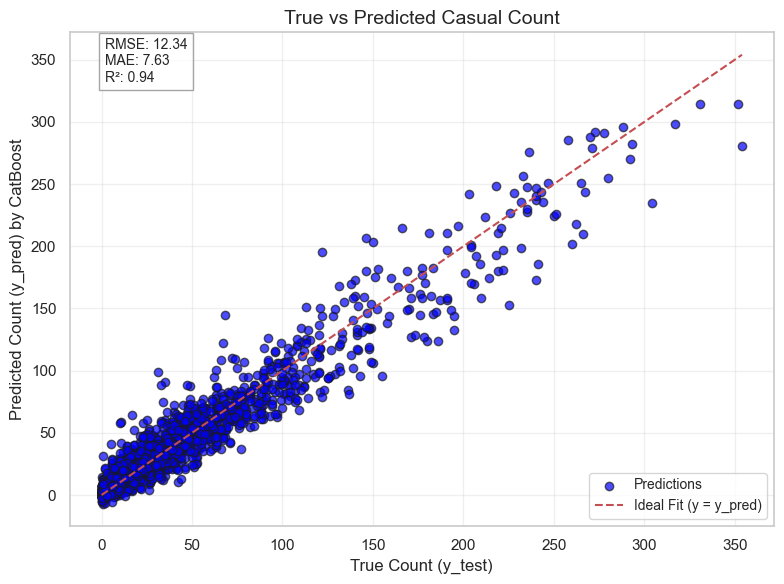

In [1703]:
# Retrieve the best model
# Assuming random_search_casual was the intended variable based on previous code
best_model_casual = grid_search_casual.best_estimator_ # Assuming random_search_casual was used for hyperparameter tuning for casual model

# Predict on the test set
y_test_pred = best_model_casual.predict(X_test) # Use best_model_casual for prediction and assign to y_test_pred

# Evaluate the model's performance on the test set
test_rmse = np.sqrt(mean_squared_error(y_casual_test, y_test_pred)) # Assuming y_casual_test is the target for the casual model
test_mae = mean_absolute_error(y_casual_test, y_test_pred) # Assuming y_casual_test is the target for the casual model
test_r2 = r2_score(y_casual_test, y_test_pred) # Assuming y_casual_test is the target for the casual model

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_casual_test, y_test_pred, alpha=0.7, color='blue', edgecolors='k', label='Predictions') # Changed y_test to y_casual_test
plt.plot([y_casual_test.min(), y_casual_test.max()], [y_casual_test.min(), y_casual_test.max()], '--r', label='Ideal Fit (y = y_pred)') # Changed y_test to y_casual_test

# Add labels, title, and legend
plt.xlabel("True Count (y_test)", fontsize=12)
plt.ylabel("Predicted Count (y_pred) by CatBoost", fontsize=12)
plt.title("True vs Predicted Casual Count", fontsize=14)
plt.legend(fontsize=10)

# Add RMSE and MAE to the plot
plt.text(
    0.05, 0.9,
    f"RMSE: {test_rmse:.2f}\nMAE: {test_mae:.2f}\nR²: {test_r2:.2f}",
    fontsize=10,
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# Show the plot
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

> Distribusi Titik:
- Sebagian besar titik berada cukup dekat dengan garis ideal, terutama untuk nilai casual yang lebih kecil (0-100).
- Untuk nilai casual yang lebih besar (100-350), titik-titik mulai menyebar lebih jauh dari garis ideal, menunjukkan kesalahan prediksi yang lebih besar pada nilai yang lebih tinggi.

> Kepadatan Titik:
- Kepadatan titik lebih tinggi pada nilai rendah (0-50), yang menunjukkan bahwa sebagian besar data memiliki jumlah pengguna kasual yang kecil. Ini konsisten dengan sifat dataset  - Bike Sharing, di mana jumlah pengguna kasual sering kali rendah kecuali pada jam atau hari tertentu (seperti akhir pekan)

> Metrik Performa
- RMSE (Root Mean Squared Error) = 12.34:

RMSE mengukur rata-rata kesalahan kuadrat antara prediksi dan nilai aktual, dengan fokus lebih besar pada kesalahan besar karena kuadrat. Nilai 12.34 berarti rata-rata kesalahan prediksi sekitar 12 pengguna kasual. Mengingat rentang nilai aktual (0-350), ini cukup kecil, tetapi masih menunjukkan adanya kesalahan yang signifikan pada beberapa titik.
- MAE (Mean Absolute Error) = 7.63:

MAE mengukur rata-rata kesalahan absolut tanpa memperhatikan arah (positif/negatif). Nilai 7.63 menunjukkan bahwa rata-rata, prediksi model meleset sekitar 7-8 pengguna kasual. Ini cukup baik untuk dataset dengan rentang nilai hingga 350.
- R² (Coefficient of Determination) = 0.94:

R² mengukur seberapa baik model menjelaskan variansi dalam data. Nilai 0.94 berarti 94% variansi dalam jumlah pengguna kasual dapat dijelaskan oleh model, yang menunjukkan performa yang sangat baik. Nilai R² di atas 0.9 biasanya dianggap sangat bagus untuk regresi.

> Model CatBoost memiliki performa yang sangat baik secara keseluruhan (R² = 0.94, RMSE = 12.34, MAE = 7.63), tetapi ada ruang untuk perbaikan pada prediksi puncak penyewaan kasual (nilai tinggi). Untuk keperluan operasional, prediksi model perlu disesuaikan untuk menghindari underprediction pada situasi ramai. Untuk langkah selanjutnya, fokus pada penanganan skewness data, resampling, atau tuning model untuk meningkatkan akurasi pada nilai tinggi tanpa mengorbankan performa pada nilai rendah.

> Pola Pengguna Kasual:
    Berdasarkan analisis sebelumnya (pola per jam dan per hari), pengguna kasual cenderung meningkat pada akhir pekan dan jam-jam tertentu (misalnya, siang hingga sore). Model mungkin kesulitan menangkap puncak-puncak ini dengan akurat, terutama jika data puncak tersebut lebih sedikit dibandingkan data dengan penyewaan rendah.

> Distribusi Data:
    Dataset Bike Sharing sering kali memiliki distribusi yang skewed (banyak nilai kecil, sedikit nilai besar). Skewness ini bisa menyebabkan model lebih akurat pada nilai kecil (karena lebih banyak data untuk dipelajari) dan kurang akurat pada nilai besar.



#### Segmen Registered

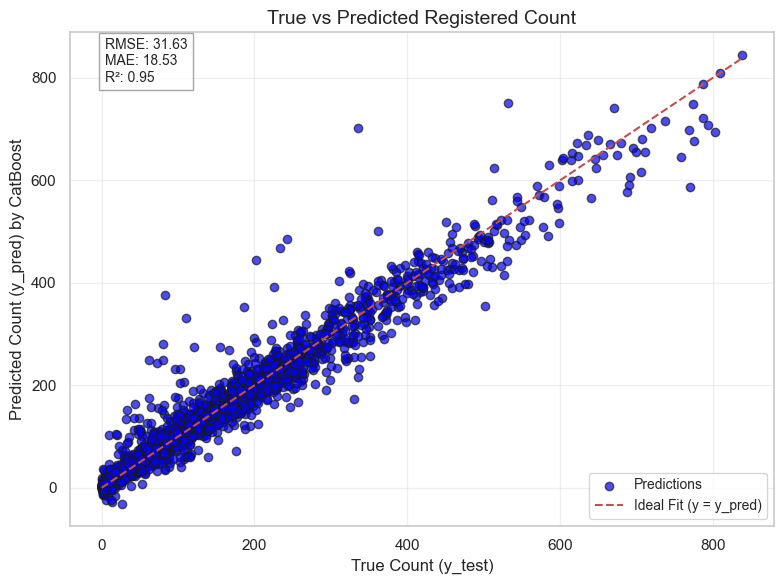

In [1704]:
# Retrieve the best model
# Assuming random_search_registered was the intended variable based on previous code
best_model_registered = grid_search_registered.best_estimator_ # Assuming random_search_registered was used for hyperparameter tuning for registered model

# Predict on the test set
y_test_pred = best_model_registered.predict(X_test) # Use best_model_registered for prediction and assign to y_test_pred

# Evaluate the model's performance on the test set
test_rmse = np.sqrt(mean_squared_error(y_registered_test, y_test_pred)) # Assuming y_registered_test is the target for the registered model
test_mae = mean_absolute_error(y_registered_test, y_test_pred) # Assuming y_registered_test is the target for the registered model
test_r2 = r2_score(y_registered_test, y_test_pred) # Assuming y_registered_test is the target for the registered model

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_registered_test, y_test_pred, alpha=0.7, color='blue', edgecolors='k', label='Predictions') # Changed y_test to y_registered_test
plt.plot([y_registered_test.min(), y_registered_test.max()], [y_registered_test.min(), y_registered_test.max()], '--r', label='Ideal Fit (y = y_pred)') # Changed y_test to y_registered_test

# Add labels, title, and legend
plt.xlabel("True Count (y_test)", fontsize=12)
plt.ylabel("Predicted Count (y_pred) by CatBoost", fontsize=12)
plt.title("True vs Predicted Registered Count", fontsize=14)
plt.legend(fontsize=10)

# Add RMSE and MAE to the plot
plt.text(
    0.05, 0.9,
    f"RMSE: {test_rmse:.2f}\nMAE: {test_mae:.2f}\nR²: {test_r2:.2f}",
    fontsize=10,
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
)

# Show the plot
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

> Distribusi Titik:
- Sebagian besar titik berada cukup dekat dengan garis ideal, terutama untuk nilai registered yang lebih kecil (0-400).
- Untuk nilai registered yang lebih besar (400-800), titik-titik mulai menyebar lebih jauh dari garis ideal, menunjukkan kesalahan prediksi yang lebih besar pada nilai yang lebih tinggi.

> Kepadatan Titik:
Kepadatan titik lebih tinggi pada nilai rendah (0-200), yang menunjukkan bahwa sebagian besar data memiliki jumlah pengguna terdaftar yang kecil hingga sedang. Ini konsisten dengan pola pengguna terdaftar yang sering kali terkait dengan komuter kerja pada jam sibuk (pagi dan sore).

> Metrik Performa
- RMSE (Root Mean Squared Error) = 31.63:

RMSE mengukur rata-rata kesalahan kuadrat antara prediksi dan nilai aktual, dengan penekanan pada kesalahan besar karena kuadrat. Nilai 31.63 berarti rata-rata kesalahan prediksi sekitar 31-32 pengguna terdaftar. Mengingat rentang nilai aktual (0-800), ini relatif kecil, tetapi lebih besar dibandingkan RMSE untuk casual (12.34), mencerminkan variabilitas yang lebih tinggi pada registered.
- MAE (Mean Absolute Error) = 18.53:

MAE mengukur rata-rata kesalahan absolut tanpa memperhatikan arah. Nilai 18.53 menunjukkan bahwa rata-rata, prediksi model meleset sekitar 18-19 pengguna terdaftar. Ini cukup baik untuk rentang data hingga 800, tetapi lebih tinggi dibandingkan MAE untuk casual (7.63), menunjukkan kesalahan yang lebih signifikan.
- R² (Coefficient of Determination) = 0.95:

R² menunjukkan bahwa 95% variansi dalam jumlah pengguna terdaftar dapat dijelaskan oleh model, yang merupakan performa yang sangat baik. Nilai ini sama dengan R² untuk casual, menunjukkan konsistensi model di kedua target, meskipun skala datanya berbeda.

> Model CatBoost menunjukkan performa yang sangat baik secara keseluruhan (R² = 0.95, RMSE = 31.63, MAE = 18.53) untuk memprediksi jumlah pengguna terdaftar, dengan pola kesalahan yang mirip dengan casual (underprediction pada nilai tinggi dan sedikit overprediction pada nilai rendah). Untuk keperluan operasional, prediksi puncak perlu disesuaikan, dan untuk perbaikan model, fokus pada penanganan skewness, resampling, atau tuning untuk meningkatkan akurasi pada nilai tinggi tanpa mengorbankan performa pada nilai rendah.

> Pola Pengguna Registered
    Berdasarkan analisis sebelumnya, pengguna terdaftar cenderung meningkat pada jam sibuk hari kerja (7-9 pagi dan 17-18 sore). Model mungkin kesulitan menangkap puncak-puncak ini dengan akurat, terutama jika data puncak tersebut lebih sedikit dibandingkan data dengan penyewaan sedang.

> Distribusi Data Registereda
    Seperti pada casual, dataset registered mungkin memiliki distribusi yang skewed (banyak nilai sedang, sedikit nilai besar). Skewness ini bisa menyebabkan model lebih akurat pada nilai rendah hingga sedang dan kurang akurat pada nilai tinggi.

#### Perbandingan Casual dan Registered

> Penyebaran Data:
- Plot Casual menunjukkan mayoritas data terkonsentrasi pada nilai aktual yang rendah (0-100)
- Plot Registered menunjukkan distribusi yang lebih merata dengan range nilai lebih luas (0-800)


> Pattern Prediksi:
- Kedua model cenderung underpredicting pada nilai aktual tinggi (titik data berada di bawah garis diagonal)
- Terdapat lebih banyak variasi/scatter pada nilai tinggi, menunjukkan model kurang akurat pada kasus ekstrem


> Tingkat Bias:
- Model Registered memiliki bias yang lebih rendah (titik lebih tersebar merata di sekitar garis diagonal)
Model Casual menunjukkan bias sistematis pada nilai tinggi



> Insight Perbandingan

- Prediktabilitas Segmen:
1. Registered users lebih predictable (R² lebih tinggi) dibandingkan casual users
2. Ini mengkonfirmasi hipotesis bahwa pengguna registered memiliki pola penggunaan yang lebih teratur dan konsisten


- Error Absolut vs Relatif:
1. RMSE Registered (33.59) jauh lebih tinggi dari Casual (13.03), namun ini mencerminkan perbedaan skala nilai
2. Secara relatif, model Registered sebenarnya lebih akurat (R² lebih tinggi)


> Implikasi Bisnis
1. Strategi Prediksi Berbeda:

- Prediksi casual users memerlukan pendekatan yang lebih spesifik untuk kondisi ekstrem
- Registered users lebih dapat diandalkan untuk forecasting jangka panjang


2. Resource Allocation:

- Alokasi sepeda perlu buffer tambahan karena model cenderung underpredicting pada permintaan tinggi
- Strategi alokasi lebih konservatif diperlukan untuk casual users karena tingkat error relatif lebih tinggi


3. Potensi Perbaikan Model:

- Ensemble model mungkin diperlukan untuk meningkatkan prediksi pada nilai ekstrem
- Feature engineering tambahan untuk kondisi spesifik yang menyebabkan peningkatan penggunaan drastis


> ***Kesimpulan*** :
Model menunjukkan performa yang cukup baik dengan R² sebesar 0,93 (casual) dan 0.95 (registered), meskipun masih ada ruang signifikan untuk perbaikan. Kemampuan prediksi yang lebih baik untuk registered users mengkonfirmasi pola penggunaan mereka yang lebih terstruktur. Perhatian khusus perlu diberikan pada prediksi untuk periode permintaan tinggi, dimana model cenderung underpredicting.

## H. Kesimpulan 

Berdasarkan seluruh hasil analisis, dapat disimpulkan bahwa:
1. Model prediktif untuk jumlah pengguna casual dan registered berhasil dibuat dengan algoritma CatBoost yang memiliki performa solid:
- Casual: RMSE = 13.03, MAE = 8.06, R² = 0.93
- Registered: RMSE = 33.59, MAE = 20.30, R² = 0.95

2. Faktor eksternal yang berpengaruh paling signifikan terhadap pengguna casual adalah : waktu peak hour weekend (kemungkinan untuk aktivitas rekreasi atau bersantai), suhu, serta hari libur (weekend). Sementara faktor eksternal yang berpengaruh paling signifikan terhadap pengguna registered adalah : waktu peak hour weekday (kemungkinan keperluan komuter perjalanan kerja), suhu dan hari kerja (weekday).

3. Perbedaan sensitivitas pengguna casual dan registered terhadap faktor eksternal (cuaca, waktu dan hari):
- Waktu: pengguna terdaftar memiliki sensitivitas yang lebih tinggi terhadap waktu (total pengaruh 63.57% vs 46.74% pada casual), dengan fokus pada jam sibuk hari kerja, sedangkan pengguna kasual lebih fleksibel dalam penggunaan waktu.
- Hari: pengguna kasual lebih sensitif terhadap perbedaan hari dibandingkan pengguna terdaftar, dengan perubahan relatif yang jauh lebih besar antara hari kerja dan akhir pekan.
- Cuaca: Pengguna kasual memiliki sensitivitas yang lebih tinggi terhadap cuaca (26.23% vs 13.18%), kemungkinan karena mereka lebih fleksibel dalam memilih waktu untuk bersepeda dan lebih terpengaruh oleh kenyamanan lingkungan.

4. Kondisi yang menghasilkan proporsi casual lebih tinggi dibandingkan proporsi registered:
- Akhir Pekan (Sabtu): Proporsi meningkat hingga 44% karena aktivitas rekreasi mendominasi.
- Siang Hari (10:00-16:00): Proporsi bisa mencapai 50% karena pengguna registered rendah.
- Jam Puncak Akhir Pekan (12:00-14:00 atau 17:00-18:00): Proporsi mendekati 50% karena puncak pengguna casual.
- Cuaca Nyaman (Suhu 15-25°C, Kelembapan Rendah): Proporsi meningkat hingga 40% karena sensitivitas casual terhadap kenyamanan.


Peluang untuk strategi konversi segmen : dengan memanfaatkan kondisi di atas untuk menargetkan pengguna casual dengan promosi pendaftaran (diskon, bonus poin, acara), terutama pada Sabtu siang atau jam puncak akhir pekan dengan cuaca nyaman. Strategi ini dapat meningkatkan konversi menjadi pengguna terdaftar, memanfaatkan kehadiran tinggi pengguna casual pada kondisi tersebut.


## I. Rekomendasi

#### A. Optimalisasi Operasional Berbasis Prediksi

1) manajemen stok sepeda pada:
- hari kerja (peak hours, 07.00-09.00 dan 17.00-18.00) siapkan 500-550 sepeda (dengan buffer 10-20%) di stasiun dekat area perkantoran untuk mengakomodasi komuter registered. Redistribusi sepeda dari stasiun yang kurang sibuk pada jam non-puncak (misalnya, siang hari) untuk memenuhi kebutuhan.
- akhir pekan (peak hours, 12.00-14.00 dan 17.00-18.00) siapkan 300-330 sepeda di stasiun populer untuk rekreasi (misalnya, taman atau pusat kota) pada Sabtu dan Minggu siang. Gunakan data cuaca untuk menyesuaikan stok (tambahkan lebih banyak sepeda jika suhu nyaman).

2) penjadwalan staf dan redistribusi
- Hari Kerja (Jam Sibuk): Tingkatkan jumlah staf untuk redistribusi sepeda pada jam 7:00-9:00 dan 17:00-18:00, karena permintaan registered sangat tinggi dan membutuhkan perputaran cepat.
- Akhir Pekan (Siang Hari): Alokasikan staf untuk membantu pengguna casual (misalnya, memberikan panduan atau promosi) pada jam 10:00-16:00, ketika proporsi casual tinggi.
- Aksi Berbasis Cuaca: Pada hari dengan suhu nyaman (15-25°C) dan kelembapan rendah, tingkatkan frekuensi redistribusi sepeda di stasiun populer, karena pengguna casual akan meningkat.

#### B. Strategi Pemasaran untuk Konversi Segmen

1. kampanye pendaftaran pada akhir pekan (proporsi casual tinggi (44-50%) pada akhir pekan, memberikan peluang besar untuk konversi)
2. program loyalitas berbasis cuaca (contohnya kampanye "Sunny Days Bonus": Berikan poin ekstra untuk setiap sewa pada hari dengan cuaca nyaman kepada pengguna yang mendaftar sebagai member)
3. program loyalitas pada jam sibuk kerja (contohnya program "Commuter Rewards": Berikan poin untuk setiap sewa pada jam sibuk yang dapat ditukar dengan diskon keanggotaan atau aksesori sepeda)
4. penawaran berbasis konsistensi (contohnya berikan bonus tahunan (misalnya, 1 minggu gratis) kepada pengguna registered yang melakukan sewa minimal 20 hari dalam sebulan selama 6 bulan berturut-turut)

#### C. Kampanye Edukasi

1. kampanye "Berpindah ke Keanggotaan" yang menjelaskan manfaat menjadi pengguna terdaftar (misalnya, biaya lebih murah dalam jangka panjang, prioritas sewa pada jam sibuk) melalui email atau notifikasi aplikasi pada akhir pekan.
2. kampanye berbasis cuaca, seperti: Kirim notifikasi push pada hari dengan suhu nyaman: "Hari Ini Sempurna untuk Bersepeda! Daftar Sekarang dan Dapatkan Sewa Gratis Pertama!".

#### D. Optimalisasi Model
1. Dilakukan eksperimen Model Ensembling dengan kombinasi berikut:
- Stacking: mengombinasikan antara model CatBoost dengan LightGBM dan XGBoost
- Bagging CatBoost dengan parameter berbeda
2. Menambahkan penjelasan detail untuk kontribusi feature terhadap target dengan analisis SHAP Values dan Partial Dependene Plots
3. Implementasikan model untuk prediksi real-time dengan pipeline yang dioptimalkan untuk latensi rendah.


File Presentasi dapat dilihat [di sini](https://www.canva.com/design/DAGmfL3KjqE/-SaDMl5UVGpRySKXgcMooA/edit?utm_content=DAGmfL3KjqE&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)